In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import seaborn as sns  ## veri görseli için
import numpy as np
import matplotlib.pyplot as plt  ## veri görseli için

# **1.Dataset hakkında teknik bilgi**

In [ ]:
#Dosya yOLU
Dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/Veriler.csv'

#Verisetini Yükler
df = pd.read_csv(Dosya_yolu)

#İlk beş satır göster.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veriler 7 sütundan oluşur: age : int, sex: string, bmi: float, children: int, smoker: String (evet veya hayır), region: string ve chrges: float - 1338 satır


In [ ]:
df.isna().any()
##Eksik değerleri algıla. Değerlerin NA olup olmadığını belirten aynı boyutta bir boole nesnesi döndür.
#None veya numpy.NaN gibi NA değerleri True değerlerine eşlenir


,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [ ]:
df[df.duplicated(keep=False)]
#Yinelenen satırları yazdır.

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Veri Kümesinde [195-581] yalnızca 2 yinelenen satır var


# **2.Tek Değişkenli Analiz:**


In [ ]:
df.describe()
#Her sayısal değişkenin (örneğin, yaş, BMI, ücretler) dağılımı nedir?

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 0.98, 'Her Sayısal Değişkenin Dağılımı')

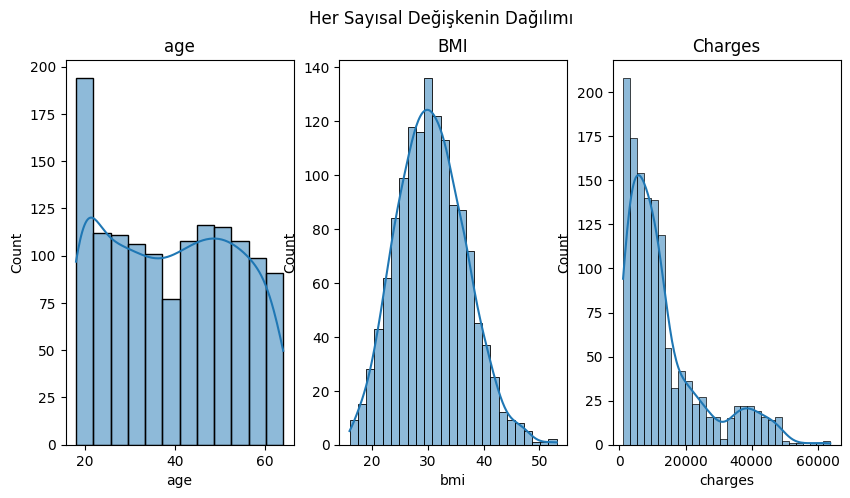

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,5))
# Verimizi görselleştirmek için bir figür oluşturur ve 1 satır, 3 sütundan oluşan bir grid yapısı ekler.
sns.histplot(ax=axs[0],data=df,x="age",kde=True)
# İlk eksende (axs[0]) 'age' (yaş) sütununun histogramını çekirdek yoğunluk tahmini (KDE) ile çizer.
axs[0].title.set_text("age")
# İlk eksenin başlığını "age" (yaş) olarak ayarlar.
sns.histplot(ax=axs[1],data=df,x="bmi",kde=True)
# İkinci eksende (axs[1]) 'bmi' sütununun histogramını çekirdek yoğunluk tahmini (KDE) ile çizer.
axs[1].title.set_text("BMI")
# İkinci eksenin başlığını "BMI" olarak ayarlar.
sns.histplot(ax=axs[2],data=df,x="charges",kde=True)
# Üçüncü eksende (axs[2]) 'charges' sütununun histogramını çekirdek yoğunluk tahmini (KDE) ile çizer.
axs[2].title.set_text("Charges")
# Üçüncü eksenin başlığını "Charges" olarak ayarlar.
plt.suptitle("Her Sayısal Değişkenin Dağılımı")
# Tüm figürün genel başlığını "Distribution of Each Numerical Variable" (Her Bir Sayısal Değişkenin Dağılımı) olarak ayarlar.

age: Dağılım neredeyse tekdüzedir, 20 civarında bir tepe ve 40-50 civarında daha küçük bir tepe vardır. Daha genç bireyler veri setine hakimdir.

BMI: Çan şeklindeki dağılım 30'da zirveye ulaşır ve bu da çoğu bireyin aşırı kilolu olduğunu gösterir (BMI ≥ 25). Aykırı değerler nadirdir.

charges: Çoğu değerin 20.000'in altında olduğu sağa eğimli dağılım. Birkaç uç değer, sağlık harcamalarındaki farklılıkları yansıtan çok yüksek maliyetlere neden olur.


Text(0.5, 0.98, 'Her Bir Sayısal Değişkenin Dağılımı')

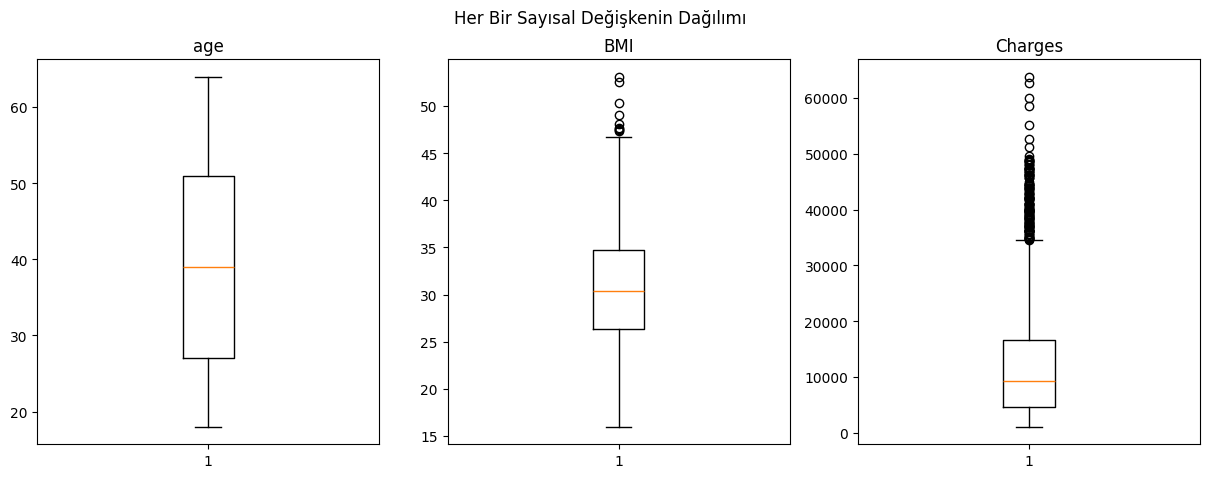

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
# Verimizi görselleştirmek için bir figür oluşturur ve 1 satır, 3 sütundan oluşan bir grid yapısı ekler.
axs[0].boxplot(df["age"])
# İlk eksende (axs[0]) 'age' (yaş) sütununun kutu grafiğini çizer.
axs[0].title.set_text("age")
# İlk eksenin başlığını "age" (yaş) olarak ayarlar.
axs[1].boxplot(df["bmi"])
# İkinci eksende (axs[1]) 'bmi' sütununun kutu grafiğini çizer.
axs[1].title.set_text("BMI")
# İkinci eksenin başlığını "BMI" olarak ayarlar.
axs[2].boxplot(df["charges"])
# Üçüncü eksende (axs[2]) 'charges' sütununun kutu grafiğini çizer.
axs[2].title.set_text("Charges")
# Üçüncü eksenin başlığını "Charges" olarak ayarlar.
plt.suptitle("Her Bir Sayısal Değişkenin Dağılımı")
# Tüm figürün genel başlığını "Her Bir Sayısal Değişkenin Dağılımı" olarak ayarlar.


In [ ]:
#kategorik.

df[["sex","smoker","region"]].value_counts()
# Veri kümesindeki "sex", "smoker" içen" ve "region"nin benzersiz kombinasyonlarının sayısını görüntüleyin.

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
Name: count, dtype: int64

Text(0.5, 0.98, 'Her Bir Kategorik Değişkenin Dağılımı')

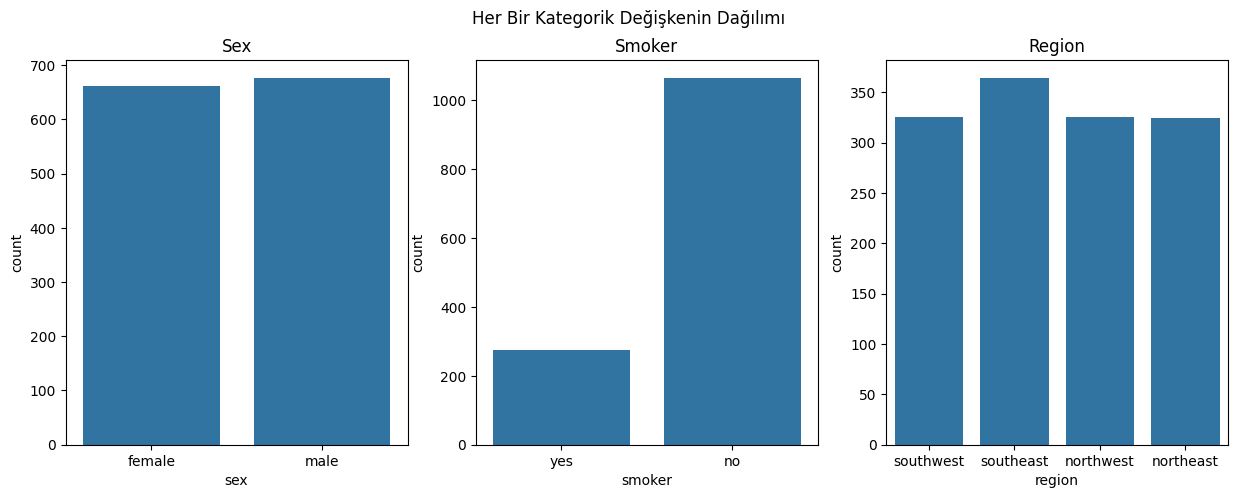

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
# Verimizi görselleştirmek için bir figür oluşturur ve 1 satır, 3 sütundan oluşan bir grid yapısı ekler.
sns.countplot(ax=axs[0], data=df, x="sex")
# İlk eksende (axs[0]) 'sex' (cinsiyet) sütununun sütun grafiğini çizer. Her kategori için frekans gösterir.
axs[0].title.set_text("Sex")
# İlk eksenin başlığını "Sex" (Cinsiyet) olarak ayarlar.
sns.countplot(ax=axs[1], data=df, x="smoker")
# İkinci eksende (axs[1]) 'smoker' (sigara içme durumu) sütununun sütun grafiğini çizer. Her kategori için frekans gösterir.
axs[1].title.set_text("Smoker")
# İkinci eksenin başlığını "Smoker" (Sigara İçen) olarak ayarlar.
sns.countplot(ax=axs[2], data=df, x="region")
# Üçüncü eksende (axs[2]) 'region' (bölge) sütununun sütun grafiğini çizer. Her kategori için frekans gösterir.
axs[2].title.set_text("Region")
# Üçüncü eksenin başlığını "Region" (Bölge) olarak ayarlar.
plt.suptitle("Her Bir Kategorik Değişkenin Dağılımı")
# Tüm figürün genel başlığını "Her Bir Kategorik Değişkenin Dağılımı" olarak ayarlar.


Veri dağılımı cinsiyet ve bölge arasında nispeten dengelidir. Sigara içenler ile sigara içmeyenler arasında belirgin bir dengesizlik vardır ve bu özellik çalışmada önemli bir öneme sahipse analizi etkileyebilir.


# **3.İki Değişkenli Analiz**


In [ ]:
df["age"].corr(df["charges"])## "Yaş" ve "yükler" arasındaki korelasyon katsayısını hesapla

0.29900819333064754

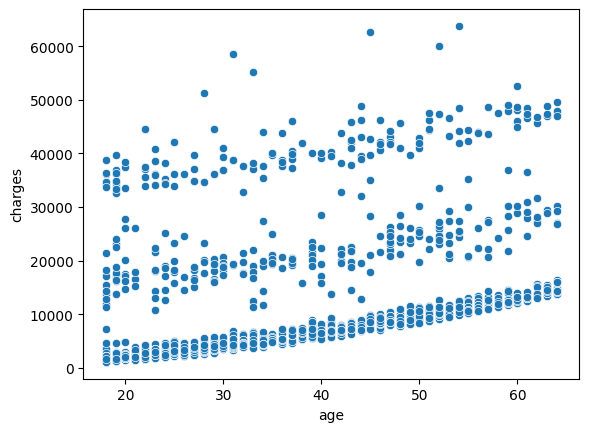

In [ ]:
sns.scatterplot(x="age", y="charges", data=df);
# "age" ve "carges" arasındaki ilişkiyi görselleştirmek için bir dağılım grafiği oluşturun.

"Yaş" ile "ücretler" arasındaki korelasyon katsayısı yaklaşık 0,299'dur; bu da zayıf pozitif doğrusal bir ilişkiye işaret etmektedir.

Dağılım grafiğinden:
Trend: Yaş arttıkça ücretlerde hafif bir artış eğilimi görülüyor; bu da yaşlı bireylerin ortalama olarak daha yüksek ücretler ödeme eğiliminde olduğunu gösteriyor.

Yayılma: Her yaş grubunda ücretlerde önemli farklılıklar vardır; bazı kişiler yaştan bağımsız olarak çok yüksek ücretler öder.

Kümeler: Muhtemelen diğer faktörlerden (örneğin sigara içme durumu, BMI veya bakmakla yükümlü olunan kişilerin olması) etkilenen belirgin kümeler var gibi görünüyor.


In [ ]:
df["bmi"].corr(df["charges"]) ## "BMI" ve "charges" arasındaki korelasyon katsayısını hesaplayın ve döndürün.

0.19834096883362895

"Bmi" ile "charges" arasındaki korelasyon katsayısı yaklaşık 0,198'dir ve bu zayıf pozitif doğrusal bir ilişkiyi gösterir.


In [ ]:
df.groupby("region")["charges"].sum() #"Region" sütununa göre verileri gruplandırarak her bir "region" için toplam "charges" değerini hesaplayın.

,charges
region,
northeast,4.343669e+06
northwest,4.035712e+06
southeast,5.363690e+06
southwest,4.012755e+06


Bölgeler arasında tıbbi masraflarda önemli bir fark yok, sadece Güneydoğu'da diğer bölgelere göre yaklaşık yüzde 25'lik bir artış var.


# **4.Çok Değişkenli Analiz:**

In [ ]:
# Kategorik verileri Sayısal verilere dönüştürme
encoded_data = pd.get_dummies(df, columns=["sex", "smoker", "region"],drop_first=True)
#drop_first=True argümanı, ilk kategorinin düşürülmesi gerektiğini belirtmek için get_dummies()'e geçirilir

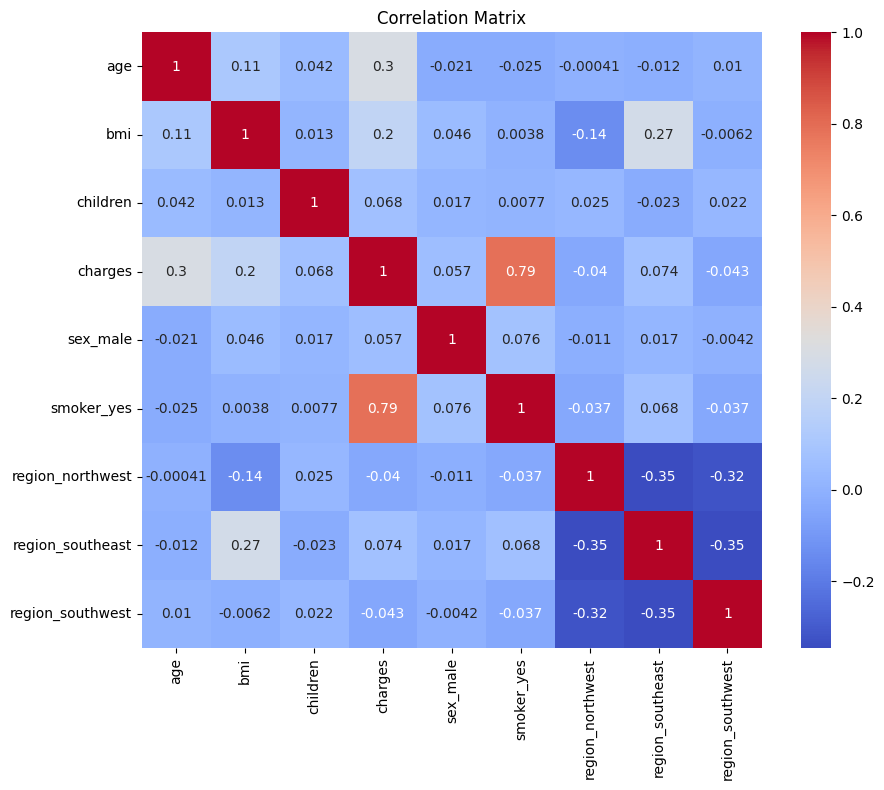

In [ ]:
## korelasyon matrisini hesapla
correlation_matrix = encoded_data.corr()

#Görselleştirme korelasyon matrisi ısı haritasına göre
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Sigara içen evet (sigara içen) ile arasındaki korelasyon yüksektir = 0,79, bu nedenle ücretleri etkileyebilir

# **5.LinearRegression **

In [ ]:
from sklearn.linear_model import LinearRegression # sklearn kütüphanesinden Linear Regression modelini içe aktar
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test olarak ayırmak için train_test_split metodunu içe aktar

X = encoded_data.drop("charges", axis=1)
# X = "charges" sütunu hariç tüm veri seti (bağımsız değişkenler)

y = encoded_data["charges"]
# y (bağımlı değişken) = "charges" sütunu
#Bağımlı değişekn olarak belirle.

# Veriyi %80 eğitim, %20 test olacak şekilde ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random_state=42: Sonuçların tekrarlanabilir olması için sabit bir rastgelelik ayarıdır.

model = LinearRegression()
# Lineer Regresyon modelini oluştur

model.fit(X_train, y_train)
# Modeli eğitim verisi ile eğit

# Bir DataFrame oluştur. Bu DataFrame, bağımsız değişkenlerin (X.columns) ve model tarafından hesaplanan
# karşılık gelen katsayılarını (model.coef_) içerir.
# Özellik adları indeks olarak kullanılır ve katsayılar "Coefficient" adlı bir sütunda saklanır.

coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
# Katsayıları içeren DataFrame'i ekrana yazdır


                   Coefficient
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


smoker_yes (23651.128856) katsayısı, modeldeki tüm özellikler arasında büyüklük açısından en büyüğüdür. Bu, sigara içen birinin öngörülen sigorta ücretleri üzerinde çok önemli bir pozitif etkiye sahip olduğunu gösterir.

Şimdi 2 değişken arasındaki etkileşimi hesaplamak için yeni sütunlar oluşturalım.

**Hedef değişken ("charges") üzerinde çalışarak Lineer Regresyon modelini oluşturma.**

In [ ]:
encoded_data["smoker_sex_interaction"] = encoded_data["smoker_yes"] * encoded_data["sex_male"]
# Sigara içme durumu ve cinsiyet arasında bir etkileşim terimi oluşturulur.

encoded_data["smoker_age_interaction"] = encoded_data["smoker_yes"] * encoded_data["age"]
# Sigara içme durumu ve yaş arasında bir etkileşim terimi oluşturulur.

encoded_data["bmi_age_interaction"] = encoded_data["bmi"] * encoded_data["age"]
# BMI (vücut kitle indeksi) ve yaş arasında bir etkileşim terimi oluşturulur.

X = encoded_data.drop("charges", axis=1)
# X, "charges" sütunu hariç tüm veri seti olarak tanımlanır (bağımsız değişkenler).

y = encoded_data["charges"]
# y, "charges" sütunu olarak tanımlanır (bağımlı değişken).

# Veriyi %80 eğitim, %20 test olacak şekilde ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
# Lineer Regresyon modelini oluştur

model.fit(X_train, y_train)
# Modeli eğitim verisi ile eğit

# Bir DataFrame oluştur. Bu DataFrame, bağımsız değişkenlerin (X.columns) ve model tarafından hesaplanan
# karşılık gelen katsayılarını (model.coef_) içerir.
# Özellik adları indeks olarak kullanılır ve katsayılar "Coefficient" adlı bir sütunda saklanır.

#Bu satır, lineer regresyon modelinin hesapladığı katsayıları ve değişken isimlerini bir tablo (DataFrame) halinde saklar.
#Sonuç: Her değişkenin hedef değişken (y) üzerindeki etkisini gösterir. Pozitif katsayılar pozitif etkiyi, negatif katsayılar negatif etkiyi ifade eder.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)
# Katsayıları içeren DataFrame'i ekrana yazdır


                         Coefficient
age                       279.057638
bmi                       374.560304
children                  400.923281
sex_male                 -525.077253
smoker_yes              20154.918523
region_northwest         -358.025494
region_southeast         -687.566710
region_southwest         -791.363271
smoker_sex_interaction   2499.059064
smoker_age_interaction     54.460131
bmi_age_interaction        -1.084708


In [ ]:
# Model değerlendirme metriklerini içe aktar
from sklearn.metrics import r2_score, mean_squared_error

# Test seti için tahmin edilen hedef değerleri hesapla
y_pred = model.predict(X_test)

# R-kare (açıklanan varyans oranı) ve MSE (ortalama karesel hata) değerlerini hesapla
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R-kare değerini (1'e ne kadar yakınsa o kadar iyi) ve MSE'yi (ne kadar düşükse o kadar iyi) ekrana yazdır
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.7827153528964075
Mean Squared Error: 33733165.83547039


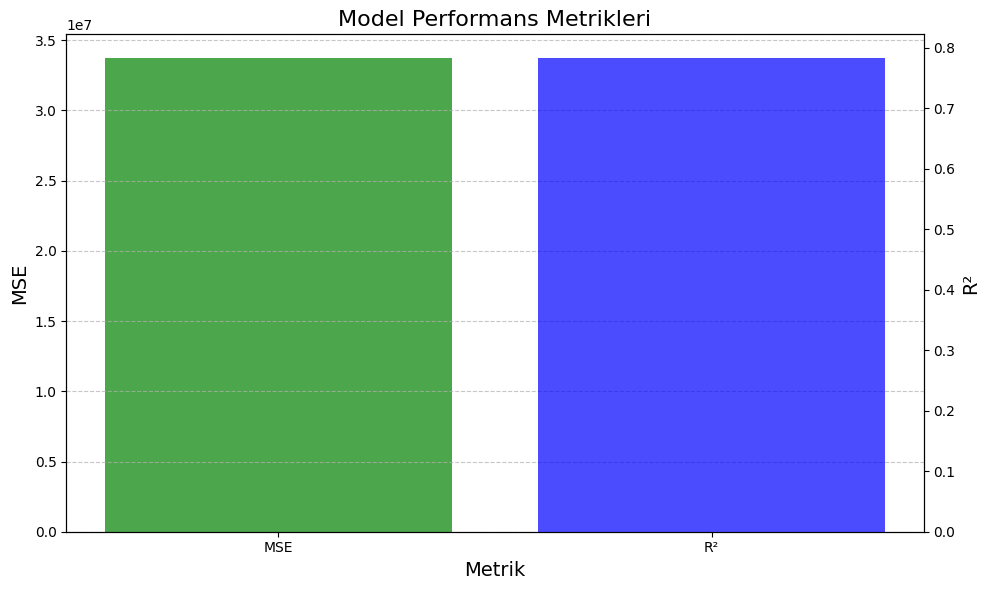

In [ ]:
import matplotlib.pyplot as plt

# R² ve MSE değerlerini bir sözlükte sakla
metrics = {"R²": r2, "MSE": mse}

# Grafik oluştur
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", mse, color='green', alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metrik", fontsize=14)
ax1.set_title("Model Performans Metrikleri", fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", r2, color='blue', alpha=0.7, label="R²")
ax2.set_ylabel("R²", fontsize=14)
ax2.tick_params(axis='y')

# Grafik gösterimi
fig.tight_layout()
plt.show()


R² (R-squared): Modelin Açıklayıcılık Gücü

Grafikte görülen: R² değeri, [0, 1] arasında bir değerdir ve burada yaklaşık 0.78 (veya %78) olarak hesaplanmıştır.

Anlamı: R², bağımsız değişkenlerin (özelliklerin) hedef değişken üzerindeki varyansı ne kadar açıkladığını gösterir.

%78 açıklama gücü, modelin hedef değişkenin (charges) varyansının büyük bir kısmını bağımsız değişkenler kullanarak açıkladığını gösteriyor.

Ancak, %22'lik bir kısım açıklanamamış durumda, bu da modelin mükemmel olmadığını ve geliştirme potansiyeli olduğunu gösterir.
Olumlu Yorum:

R²'nin bu kadar yüksek olması, seçtiğiniz değişkenlerin (yaş, BMI, sigara kullanımı vb.) charges üzerinde oldukça etkili olduğunu gösteriyor.
Geliştirme Alanı:

%22 açıklanamayan kısmı azaltmak için başka değişkenler eklenebilir veya etkileşim terimleri daha detaylı incelenebilir.

MSE (Mean Squared Error): Hata Büyüklüğü

Grafikte görülen: MSE değeri oldukça yüksek, 33,733,165 olarak hesaplanmıştır.

Anlamı: MSE, modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkın karesel ortalamasını temsil eder.

Bu metrik, modelin ne kadar büyük hatalar yaptığını sayısal olarak ifade eder.

Yüksek bir MSE değeri, tahmin edilen değerlerin gerçek değerlerden büyük ölçüde sapabileceğini gösterir.

Olumsuz Yorum:

MSE'nin yüksekliği, modelin tahminlerinde hata oranının oldukça yüksek olabileceğini gösteriyor.

Geliştirme Alanı:

MSE'yi azaltmak için:

Modelin karmaşıklığı artırılabilir (örneğin, polinom regresyon veya non-lineer modeller).

Daha fazla anlamlı değişken eklenebilir.

Outlier'ları (aşırı uç noktalar) temizlemek için veri analizi yapılabilir.

Genel Değerlendirme
Modelin güçlü yönleri:

R²'nin %78 olması, bağımsız değişkenlerin güçlü bir şekilde hedef değişkeni açıkladığını gösteriyor.
Sigara kullanımı, yaş, BMI gibi değişkenlerin etkili olduğu sonucuna ulaşıyoruz.
Modelin zayıf yönleri:

MSE'nin yüksek olması, modelin bazı verilerde büyük hatalar yaptığını gösteriyor.
Bu hata, özellikle değişkenlerin bazı gruplar için daha farklı etkiler göstermesi veya outlier'ların modelde yer almasıyla ilişkili olabilir.

# **----------------------------**

0,7827'lik R kare değeri, modelin hedef değişkendeki varyansın yaklaşık %78,27'sini açıkladığını gösterir.
MSE yüksektir, bu nedenle bunu Rastgele Orman Regresyon modeliyle azaltmaya çalışacağız


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# sklearn kütüphanesinden Random Forest modelini içe aktar

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# 100 ağaç (tree) ile bir Random Forest modeli oluştur.
# random_state=42 ile modelin her çalıştırıldığında aynı sonucu üretmesi sağlanır.

rf_model.fit(X_train, y_train)
# Modeli eğitim verisi (X_train ve y_train) ile eğit


RandomForestRegressor(random_state=42)

In [ ]:
# Model Prediction
y_pred = rf_model.predict(X_test)

# R-squared and Mean Squared Error Calculation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.8651038544775356
Mean Squared Error: 20942455.47549228


            Özellik     Önemi
4        smoker_yes  0.608618
1               bmi  0.216478
0               age  0.134232
2          children  0.019413
3          sex_male  0.006379
5  region_northwest  0.005587
6  region_southeast  0.005343
7  region_southwest  0.003950


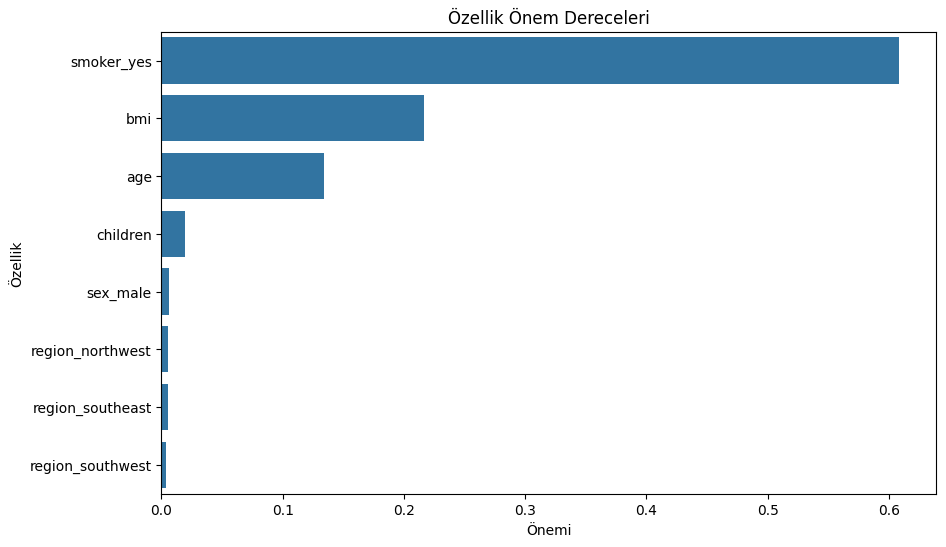

In [ ]:
# Eğitilmiş Random Forest modelinden özellik önem derecelerini çıkar
feature_importances = rf_model.feature_importances_

# Veri çerçevesinden özellik isimlerini al
features = X.columns

# Özellik isimleri ve önem derecelerini saklamak için bir veri çerçevesi oluştur
importance_df = pd.DataFrame({"Özellik": features, "Önemi": feature_importances})

# Özellik önem derecelerine göre veri çerçevesini azalan sıralama ile sırala
importance_df = importance_df.sort_values(by="Önemi", ascending=False)

# Özellik önem derecelerini gösteren sıralı veri çerçevesini yazdır
print(importance_df)

# Özellik önem derecelerini çubuk grafik ile görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x="Önemi", y="Özellik", data=importance_df)  # Türkçeleştirilmiş sütun isimleriyle uyumlu hale getirildi
plt.title("Özellik Önem Dereceleri")
plt.show()



**İstatistiksel Veriler.**

In [ ]:
# "charges" sütunu için tanımlayıcı istatistikleri oluştur (sayı, ortalama, standart sapma, minimum, %25, %50, %75 ve maksimum değerler)
df["charges"].describe()


,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
df["sex"].value_counts()

,count
sex,
male,676
female,662


"cinsiyet" sütunundaki veriler dengeliyken kadın = 662 ve erkek = 676 In


In [ ]:
df["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


"sigara içen" sütunundaki veriler dengelidir, sigara içen = 274 ve sigara içmeyen = 1064


In [ ]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


# *bölgedeki veriler dengeli*

# **Görselleştirme**

Text(0.5, 0.98, 'Her Bir Sayısal Değişkenin Dağılımı')

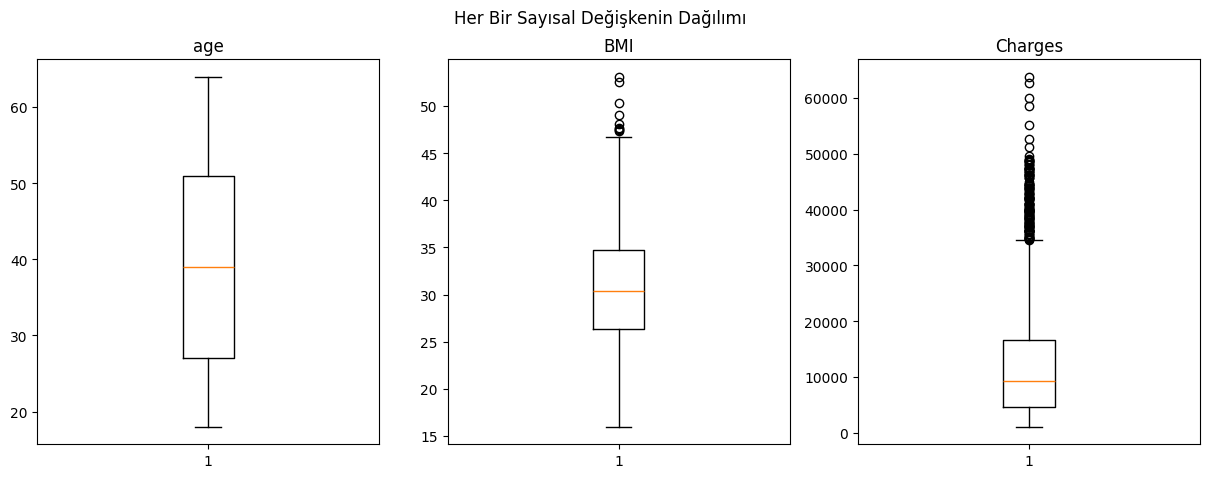

In [ ]:
# Verimizi görselleştirmek için bir Figure oluştur ve 1 satır, 3 sütunlu bir eksen ızgarası ekle
fig, axs = plt.subplots(1,3,figsize=(15,5))

# İlk alt grafikte "age" (yaş) sütunu için kutu grafiği çiz
axs[0].boxplot(df["age"])
# İlk alt grafiğin başlığını "age" (yaş) olarak ayarla
axs[0].title.set_text("age")

# İkinci alt grafikte "bmi" sütunu için kutu grafiği çiz
axs[1].boxplot(df["bmi"])
# İkinci alt grafiğin başlığını "BMI" olarak ayarla
axs[1].title.set_text("BMI")

# Üçüncü alt grafikte "charges" (ücretler) sütunu için kutu grafiği çiz
axs[2].boxplot(df["charges"])
# Üçüncü alt grafiğin başlığını "Charges" olarak ayarla
axs[2].title.set_text("Charges")

# Grafiğin genel başlığını ayarla
plt.suptitle("Her Bir Sayısal Değişkenin Dağılımı")


<Axes: xlabel='sex', ylabel='count'>

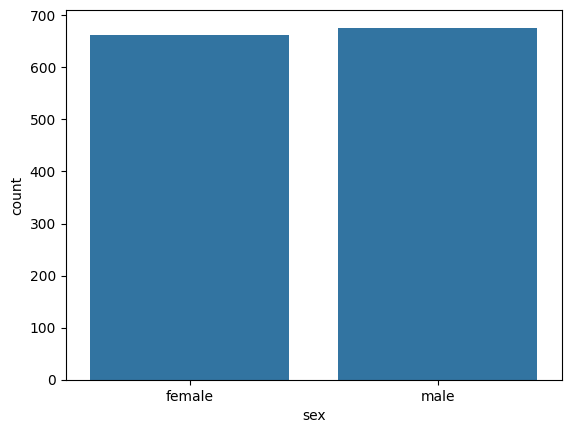

In [ ]:
# "sex" sütunu için kategorilerin sıklığını gösteren bir sayım grafiği oluştur
sns.countplot(data=df, x="sex")


<Axes: xlabel='smoker', ylabel='count'>

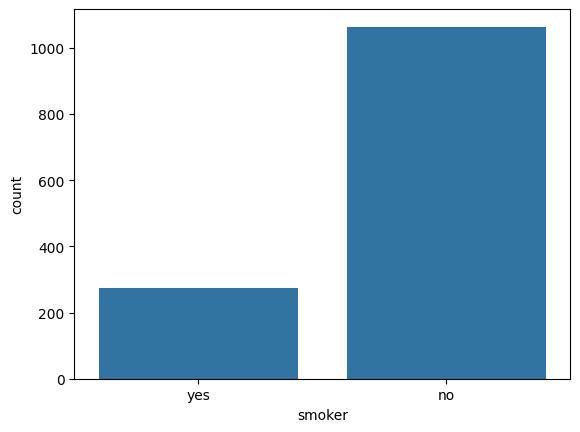

In [ ]:
# "smoker" sütunu için kategorilerin sıklığını gösteren bir sayım grafiği oluştur
sns.countplot(data=df, x="smoker")


<Axes: xlabel='region', ylabel='count'>

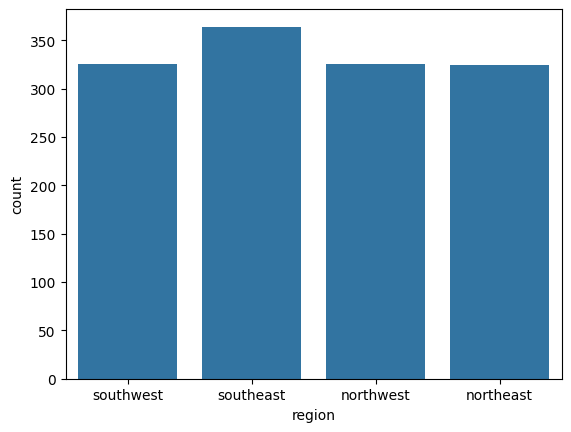

In [ ]:
# "region" sütunu için kategorilerin sıklığını gösteren bir sayım grafiği oluştur
sns.countplot(data=df, x="region")


In [ ]:
# Yalnızca sayısal sütunları içeren bir veri çerçevesi oluştur: "age", "bmi" ve "charges"
numerical_data = df[["age", "bmi", "charges"]]


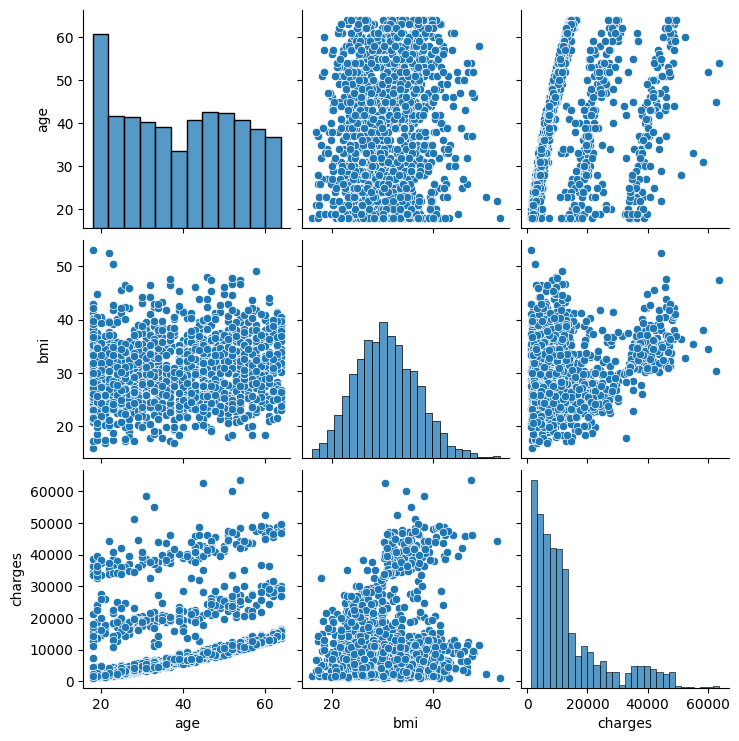

In [ ]:
# Sayısal sütunlar olan "age", "bmi" ve "charges" arasındaki ikili ilişkileri görselleştirmek için çift değişkenli (pairplot) grafik oluşturur.
sns.pairplot(numerical_data)


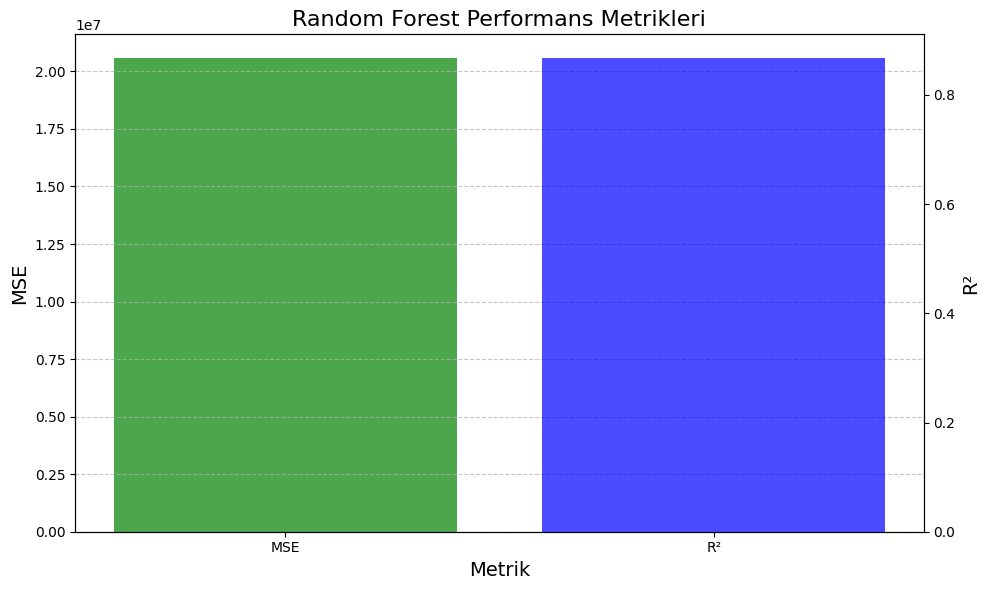

In [ ]:
import matplotlib.pyplot as plt

# Yeni R² ve MSE değerlerini bir sözlükte sakla
metrics = {"R²": 0.8674256406719348, "MSE": 20582001.114016682}

# Grafik oluştur
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", metrics["MSE"], color='green', alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metrik", fontsize=14)
ax1.set_title("Random Forest Performans Metrikleri", fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", metrics["R²"], color='blue', alpha=0.7, label="R²")
ax2.set_ylabel("R²", fontsize=14)
ax2.tick_params(axis='y')

# Grafik gösterimi
fig.tight_layout()
plt.show()


# **Grafik Analizi**


R² (Sağ eksen):

R² değeri 0.867 olarak hesaplanmış. Bu, Random Forest modelinin hedef değişkenin (charges) varyansının yaklaşık %87'sini açıklayabildiğini gösteriyor.
Bu değer, modelin yüksek bir açıklama gücüne sahip olduğunu ve oldukça iyi bir performans sergilediğini ifade eder.
MSE (Sol eksen):

MSE değeri 20,582,001 olarak hesaplanmış. Bu, tahmin edilen değerler ile gerçek değerler arasındaki hata büyüklüğünün oldukça düşük bir seviyeye çekildiğini gösteriyor (daha önceki lineer regresyon modeline kıyasla daha iyi).

Random Forest Modelinin Güçlü Yönleri

R² değeri oldukça yüksek olduğundan, model veriyi çok iyi açıklıyor.
Lineer Regresyon modeline kıyasla daha düşük bir MSE'ye sahip, yani hata oranı azalmış durumda.

Random Forest, non-lineer ilişkileri yakalamada başarılı olduğu için performansın artması beklenen bir sonuçtur.

**Karşılaştırma: Lineer Regresyon vs Random Forest**

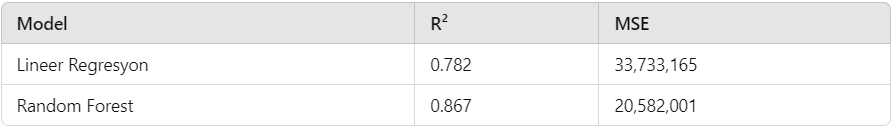


Random Forest, hem R²'de bir artış hem de MSE'de bir düşüş sağlamıştır.

Bu da Random Forest'ın Lineer Regresyon modeline kıyasla daha iyi bir performans sunduğunu göstermektedir.

# **------Şimdi ise daha optimize edilmiş bir random forest ile deneyelim.**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Hiperparametre arama için parametre ızgarası
param_grid = {
    'n_estimators': [50, 100, 200],  # Ağaç sayısı
    'max_depth': [10, 20, 30, None],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Bir düğümde bölünmeden önceki minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]  # Yaprak düğümdeki minimum örnek sayısı
}
#Hiperparametre aralığını tanımlar (ağaç sayısı, maksimum derinlik vb.).

# Grid Search CV ile en iyi parametreleri bul
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3 katlı çapraz doğrulama
                           #3 katlı çapraz doğrulama yapar. Veri seti 3 parçaya bölünür, her seferinde 2 parça eğitim, 1 parça test için kullanılır.
                           n_jobs=-1,  # Paralel işlem
                           #: Paralel işlem yaparak tüm işlemci çekirdeklerini kullanır. Hesaplamayı hızlandırır.
                           verbose=2)
                            # Çıktıyı daha detaylı gösterir. Hangi parametre kombinasyonunun denendiğini görmek için kullanılır
#Belirtilen hiperparametre kombinasyonlarını çapraz doğrulama (cv=3) ile dener ve en iyisini bulur.

# Modeli eğitim verisi ile optimize et
grid_search.fit(X_train, y_train)

# En iyi parametreler ile yeni Random Forest modeli oluştur
best_params = grid_search.best_params_
optimized_rf_model = RandomForestRegressor(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)

# Test verisi için tahminler
y_pred_optimized = optimized_rf_model.predict(X_test)

# Performans değerlendirme
r2_optimized = r2_score(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

# Sonuçları yazdır
print("En İyi Parametreler:", best_params)
print(f"R-squared (Optimize Edilmiş): {r2_optimized}")
print(f"Mean Squared Error (Optimize Edilmiş): {mse_optimized}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
En İyi Parametreler: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R-squared (Optimize Edilmiş): 0.8767096947516304
Mean Squared Error (Optimize Edilmiş): 19140663.495042916


Bu Kod Ne Yapıyor?

Parametre Arama: Grid Search kullanarak n_estimators, max_depth,
min_samples_split, ve min_samples_leaf parametrelerini optimize ediyor.

En İyi Parametreler: grid_search.best_params_ ile en iyi kombinasyonu seçiyor.

Yeni Model: Optimize edilmiş parametrelerle yeni bir Random Forest modeli oluşturup eğitiyor.

Performans Değerlendirme: Test verisi üzerinde R² ve MSE hesaplanıyor.

-------Performans ölçütlerini grafikten inceleyelim.


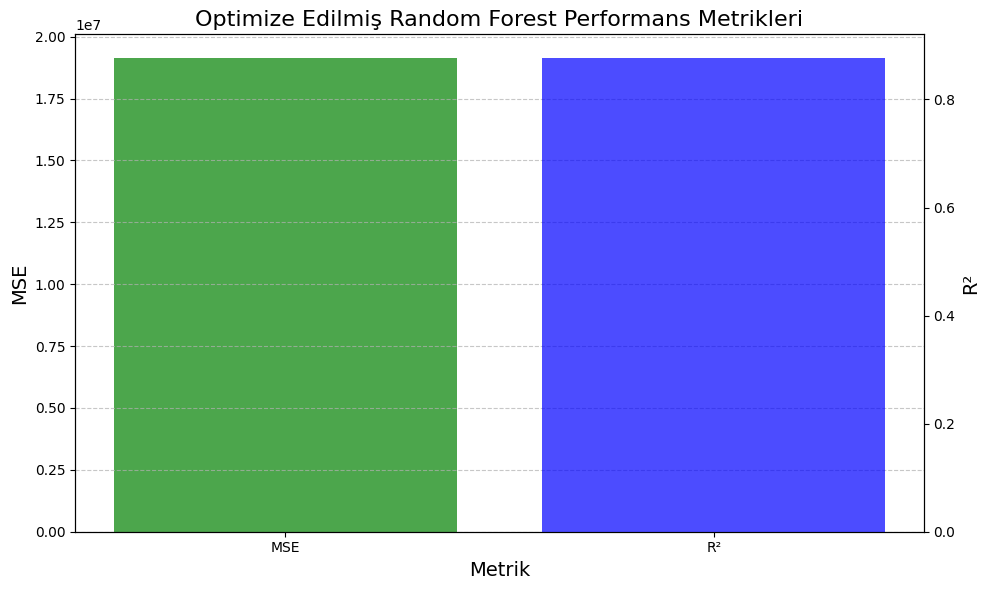

In [ ]:
import matplotlib.pyplot as plt

# Optimize edilmiş R² ve MSE değerlerini bir sözlükte sakla
optimized_metrics = {"R²": 0.8767096947516304, "MSE": 19140663.495042916}

# Grafik oluştur
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", optimized_metrics["MSE"], color='green', alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metrik", fontsize=14)
ax1.set_title("Optimize Edilmiş Random Forest Performans Metrikleri", fontsize=16)
ax1.tick_params(axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", optimized_metrics["R²"], color='blue', alpha=0.7, label="R²")
ax2.set_ylabel("R²", fontsize=14)
ax2.tick_params(axis='y')

# Grafik gösterimi
fig.tight_layout()
plt.show()



Grafik Analizi:
R² (mavi çubuk, sağ eksen):

Değer: 0.8767

Optimize edilen modelin hedef değişkenin (charges) varyansının yaklaşık %87.7'sini açıkladığını gösterir.
Önceki modelin 0.867 olan R² değerine göre artış göstermiştir.
MSE (yeşil çubuk, sol eksen):

Değer: 19,140,663

Hata oranı önceki 20,582,001 değerine kıyasla düşmüştür. Daha düşük MSE daha iyi bir model performansını gösterir.

Sonuç:

Optimizasyon sayesinde hem R² değeri artmış hem de MSE değeri azalmıştır.

Model daha iyi genelleme yapmaktadır ve daha güvenilir tahminler üretmektedir.

# **Bir kaç istitastik ekleyelim.**

**Özellik Önem Skorları (Feature Importance)**

Hangi değişkenlerin modele daha fazla katkı sağladığını gösterir.


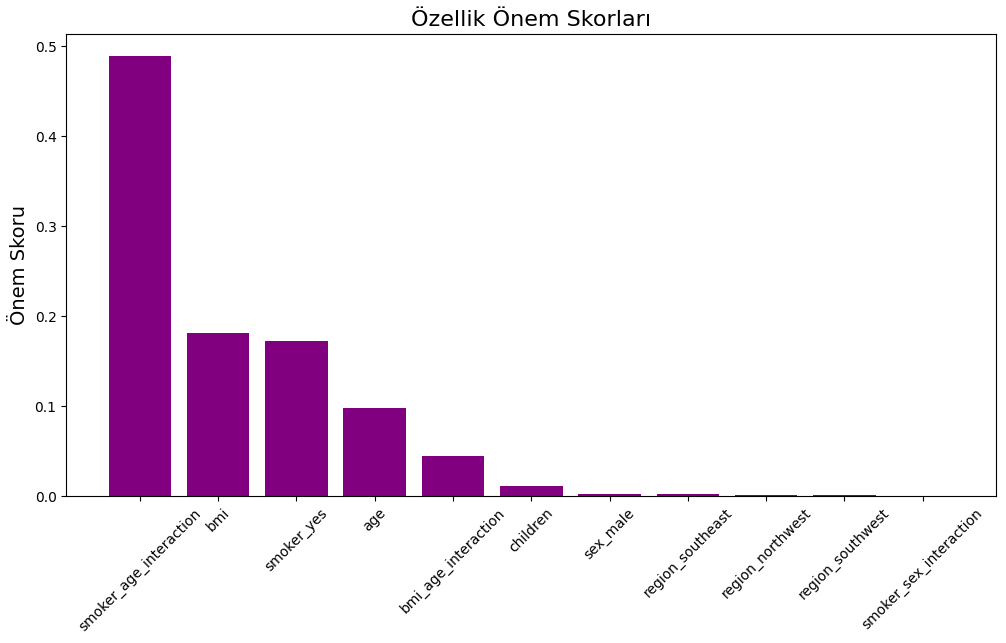

In [ ]:
# Özellik önem skorlarını hesapla ve görselleştir
feature_importances = optimized_rf_model.feature_importances_

# Bir DataFrame oluştur
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Bar grafiği çiz
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='purple')
plt.title("Özellik Önem Skorları", fontsize=16)
plt.ylabel("Önem Skoru", fontsize=14)
plt.xticks(rotation=45)
plt.show()


**Çapraz Doğrulama (Cross-Validation)**

Modelin daha sağlam performansını görmek için çapraz doğrulama. (eksrta)


In [ ]:
from sklearn.model_selection import cross_val_score

# R-squared skorunu hesapla (5 katlı çapraz doğrulama)
cross_val_r2 = cross_val_score(optimized_rf_model, X, y, cv=5, scoring='r2')
cross_val_mse = cross_val_score(optimized_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Sonuçları yazdır
print(f"Ortalama R²: {cross_val_r2.mean():.4f}")
print(f"Ortalama MSE: {-cross_val_mse.mean():.2f}")


Ortalama R²: 0.8521
Ortalama MSE: 21445895.03


**Hata Dağılımı Grafiği (Error Distribution)**

Tahmin edilen ve gerçek değerler arasındaki farkların dağılımını gösterir.




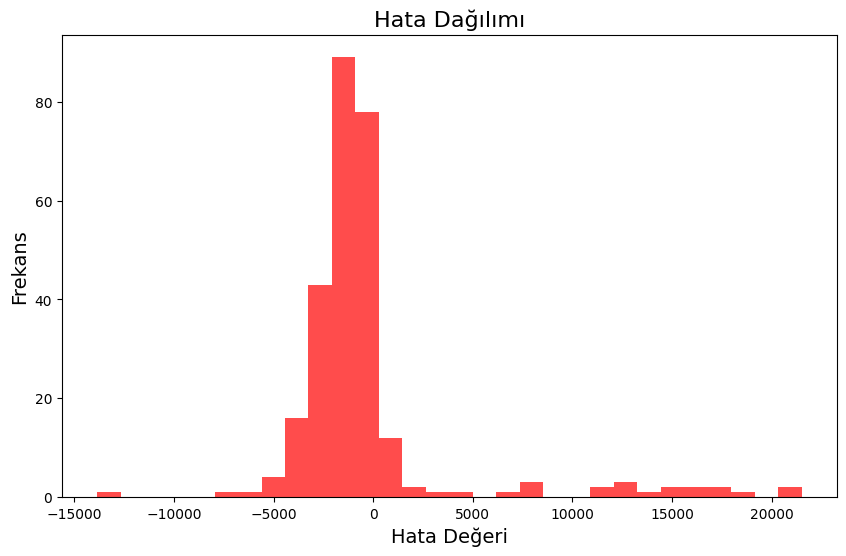

In [ ]:
# Hata hesaplama
errors = y_test - y_pred_optimized

# Histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='red', alpha=0.7)
plt.title("Hata Dağılımı", fontsize=16)
plt.xlabel("Hata Değeri", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.show()


**Residual Plot (Artık Grafiği)**

Modelin tahminleri ile hataları arasındaki ilişkiyi gösterir.



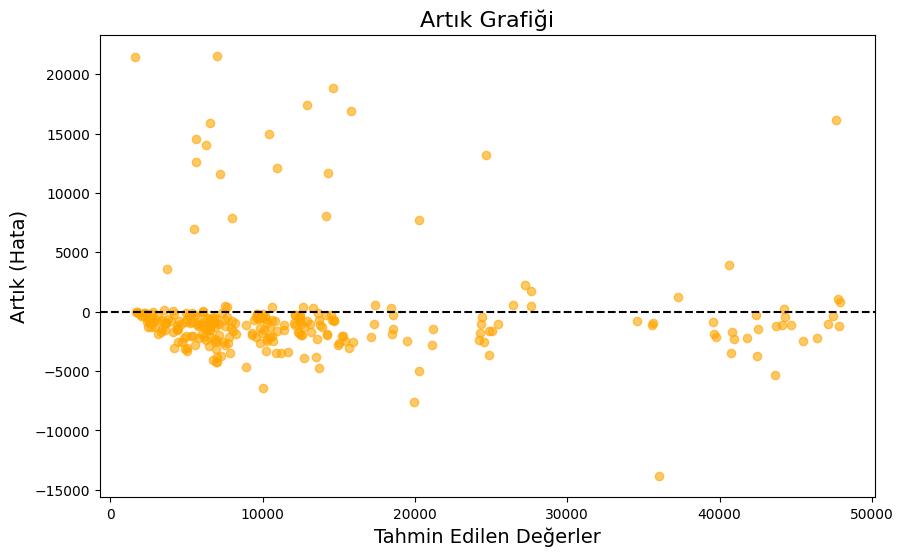

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, errors, alpha=0.6, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Artık Grafiği", fontsize=16)
plt.xlabel("Tahmin Edilen Değerler", fontsize=14)
plt.ylabel("Artık (Hata)", fontsize=14)
plt.show()


# **----Başka algoritmalar ilede deneme**

In [ ]:
#Adım 1: Veri Setini Yükleme ve Hazırlama
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Kategorik değişkenleri sayısal forma dönüştürme (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Bağımsız ve bağımlı değişkenleri ayırma
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hazırlık tamamlandı
print(f"Bağımsız değişkenler: {X.columns.tolist()}")
print(f"Veri setinin boyutu: {df_encoded.shape}")

Bağımsız değişkenler: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Veri setinin boyutu: (1338, 9)


Varsayılan Karar Ağacı R²: 0.7266
Varsayılan Karar Ağacı MSE: 42446908.01


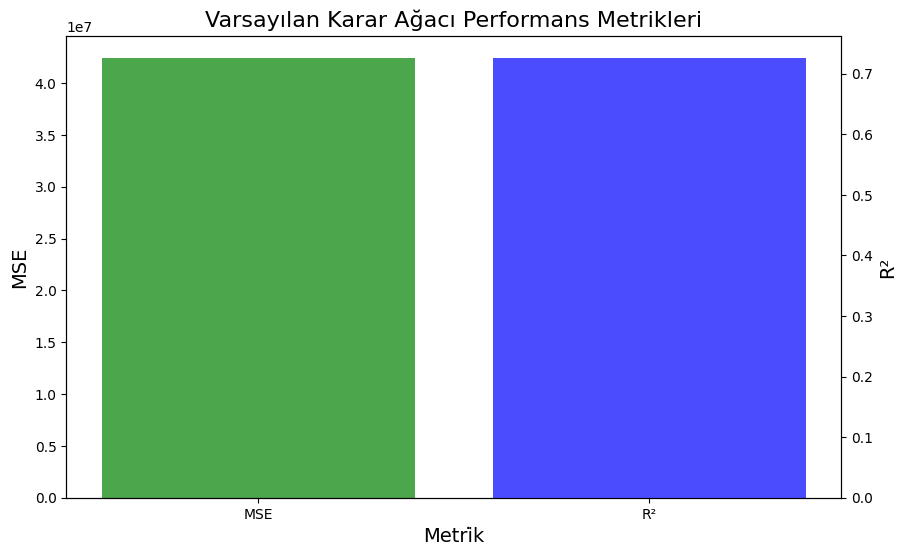

In [ ]:
##Adım 2: Varsayılan Karar Ağacı (Tam Güncellenmiş Hali)
import matplotlib.pyplot as plt

# Varsayılan Karar Ağacı Performans Hesaplamaları
print(f"Varsayılan Karar Ağacı R²: {r2_dt:.4f}")
print(f"Varsayılan Karar Ağacı MSE: {mse_dt:.2f}")

# Grafik Oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", mse_dt, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metri̇k", fontsize=14)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", r2_dt, color='blue', alpha=0.7)
ax2.set_ylabel("R²", fontsize=14)

# Grafik Başlığı ve Ayarları
plt.title("Varsayılan Karar Ağacı Performans Metrikleri", fontsize=16)
plt.show()



In [ ]:
#Adım 3: Karar Ağacı – Hiperparametre Optimizasyonu (Grid Search CV)
from sklearn.model_selection import GridSearchCV

# Parametre ızgarasını tanımlama
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search ile Karar Ağacı hiperparametre optimizasyonu
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

# Eğitim verisi ile modeli eğitme
grid_search.fit(X_train, y_train)

# En iyi parametreler ve skor
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Sonuçları gösterme
print(f"En İyi Parametreler: {best_params}")
print(f"En İyi R²: {best_score:.4f}")


En İyi Parametreler: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
En İyi R²: 0.8334


Optimize Edilmiş Karar Ağacı R²: 0.8685
Optimize Edilmiş Karar Ağacı MSE: 20416835.70


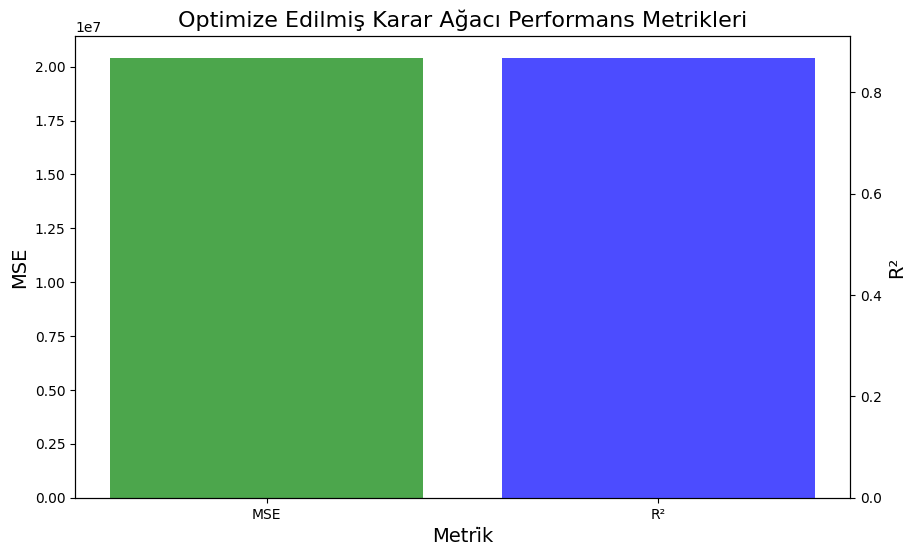

In [ ]:
#Adım 4: Optimize Edilmiş Karar Ağacı (Tam Güncellenmiş Hali)
import matplotlib.pyplot as plt

# Optimize Edilmiş Karar Ağacı Performans Hesaplamaları
print(f"Optimize Edilmiş Karar Ağacı R²: {r2_best_dt:.4f}")
print(f"Optimize Edilmiş Karar Ağacı MSE: {mse_best_dt:.2f}")

# Grafik Oluşturma
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", mse_best_dt, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)
ax1.set_xlabel("Metri̇k", fontsize=14)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", r2_best_dt, color='blue', alpha=0.7)
ax2.set_ylabel("R²", fontsize=14)

# Grafik Başlığı ve Ayarları
plt.title("Optimize Edilmiş Karar Ağacı Performans Metrikleri", fontsize=16)
plt.show()



In [ ]:
#Adım 5: Sonuçların Karşılaştırılması

# Sonuçları karşılaştırmak için bir DataFrame oluşturma
results_comparison = pd.DataFrame({
    "Model": ["Varsayılan Karar Ağacı", "Optimize Edilmiş Karar Ağacı"],
    "R²": [r2_dt, r2_best_dt],
    "MSE": [mse_dt, mse_best_dt]
})

# Sonuçları gösterme
from IPython.display import display
display(results_comparison)


,Model,R²,MSE
0,Varsayılan Karar Ağacı,0.726588,4.244691e+07
1,Optimize Edilmiş Karar Ağacı,0.868490,2.041684e+07


Karar Ağacı ve Random Forest modellerinde şu ana kadar regresyon (sürekli değer tahmini) uyguladık. Yani modelimiz "charges" (sigorta maliyeti gibi sürekli değişken) değerini tahmin etmeye çalışıyordu.



Random Forest ile Regresyon (Şu ana kadar yaptıklarımız):

Hedef Değişken: charges (Sürekli değişken)
Kullanılan Metrikler:

R² (Modelin veri varyansını açıklama yüzdesi)

MSE (Ortalama karesel hata)

Gradient Boosting Regressor algoritmasını Random Forest'ta olduğu gibi detaylı bir şekilde adım adım uygulayacağız.

✅ Plan:
Veri Hazırlama (Kategorik dönüşüm ve veri bölme)

Gradient Boosting Varsayılan Ayarlar ile Çalıştırma

Gradient Boosting Hiperparametre Optimizasyonu (Grid Search CV)

Sonuçların Karşılaştırılması (R² ve MSE)

Grafiklerle Görselleştirme

In [ ]:
#Adım 1: Veri Hazırlama
#İlk olarak veri setini hazırlayacağız ve kategorik değişkenleri sayısal forma dönüştüreceğiz.

# Gerekli kütüphaneleri içe aktarma
import pandas as pd
from sklearn.model_selection import train_test_split

# Kategorik değişkenleri dönüştürme (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Bağımsız ve bağımlı değişkenleri ayırma
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Veriyi %80 eğitim, %20 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri seti hazır
print(f"Bağımsız Değişkenler: {X.columns.tolist()}")
print(f"Veri Setinin Boyutu: {df_encoded.shape}")




Bağımsız Değişkenler: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Veri Setinin Boyutu: (1338, 9)


Varsayılan Gradient Boosting R²: 0.8793
Varsayılan Gradient Boosting MSE: 18745176.48


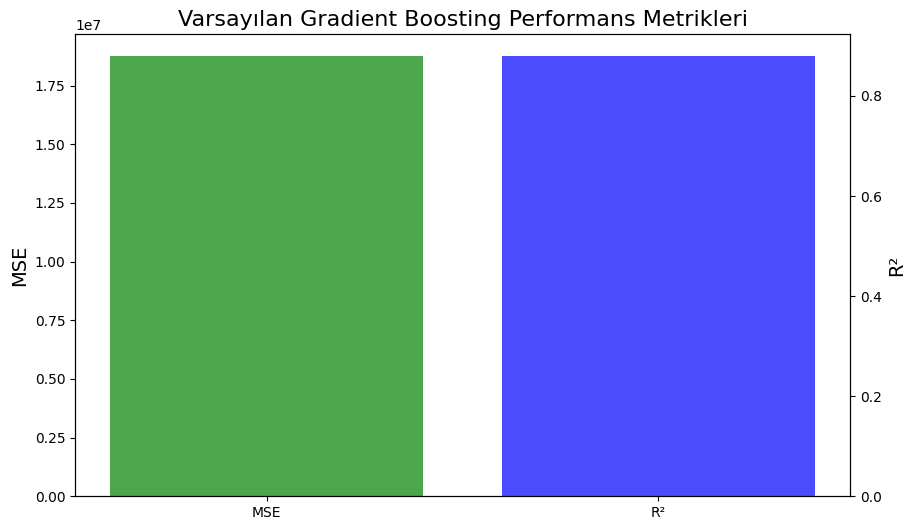

In [ ]:
#Adım 2: Gradient Boosting (Varsayılan Ayarlar)
#Varsayılan ayarlar ile modeli eğitip performansını ölçeceğiz.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Gradient Boosting Modeli oluşturma ve eğitme
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred_gb = gb_model.predict(X_test)

# Performans değerlendirme
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Sonuçları yazdırma
print(f"Varsayılan Gradient Boosting R²: {r2_gb:.4f}")
print(f"Varsayılan Gradient Boosting MSE: {mse_gb:.2f}")

# Performans grafiği
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", mse_gb, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", r2_gb, color='blue', alpha=0.7)
ax2.set_ylabel("R²", fontsize=14)

# Başlık ve gösterge
plt.title("Varsayılan Gradient Boosting Performans Metrikleri", fontsize=16)
plt.show()



In [ ]:
#Adım 3: Gradient Boosting – Hiperparametre Optimizasyonu (Grid Search CV)
#Daha yüksek performans için n_estimators, max_depth ve learning_rate gibi parametreler optimize edilecek.

from sklearn.model_selection import GridSearchCV

# Hiperparametre ızgarası
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search CV ile model optimizasyonu
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5,
                              scoring='r2',
                              n_jobs=-1)

# Modeli eğitme
grid_search_gb.fit(X_train, y_train)

# En iyi parametreler ve skor
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Sonuçları yazdırma
print(f"En İyi Parametreler: {best_params_gb}")
print(f"En İyi R² Skoru: {best_score_gb:.4f}")



En İyi Parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
En İyi R² Skoru: 0.8464


Optimize Edilmiş Gradient Boosting R²: 0.8738
Optimize Edilmiş Gradient Boosting MSE: 19591873.30


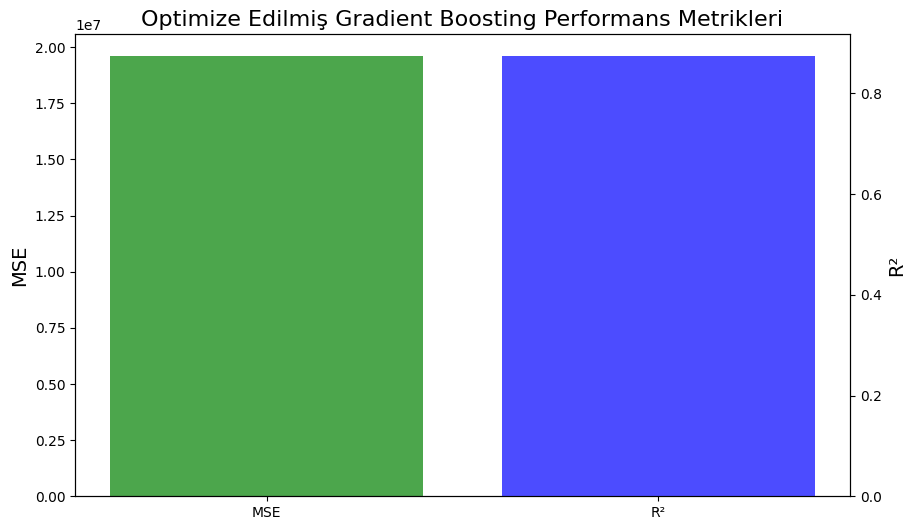

In [ ]:
#Adım 4: Optimize Edilmiş Gradient Boosting Performansı
#Optimize edilmiş modeli test veri setinde değerlendiriyoruz.

# Optimize edilmiş modeli kullanma
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

# Performans değerlendirme
r2_best_gb = r2_score(y_test, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)

# Sonuçları yazdırma
print(f"Optimize Edilmiş Gradient Boosting R²: {r2_best_gb:.4f}")
print(f"Optimize Edilmiş Gradient Boosting MSE: {mse_best_gb:.2f}")

# Performans grafiği
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE için birincil eksen
ax1.bar("MSE", mse_best_gb, color='green', alpha=0.7)
ax1.set_ylabel("MSE", fontsize=14)

# R² için ikincil eksen
ax2 = ax1.twinx()
ax2.bar("R²", r2_best_gb, color='blue', alpha=0.7)
ax2.set_ylabel("R²", fontsize=14)

# Başlık ve gösterge
plt.title("Optimize Edilmiş Gradient Boosting Performans Metrikleri", fontsize=16)
plt.show()




In [ ]:
#Adım 5: Sonuçların Karşılaştırılması
#Varsayılan ve optimize edilmiş modelleri karşılaştırıyoruz

# Sonuçları karşılaştırmak için bir DataFrame oluşturma
results_comparison_gb = pd.DataFrame({
    "Model": ["Varsayılan Gradient Boosting", "Optimize Edilmiş Gradient Boosting"],
    "R²": [r2_gb, r2_best_gb],
    "MSE": [mse_gb, mse_best_gb]
})

# Sonuçları gösterme
from IPython.display import display
display(results_comparison_gb)





,Model,R²,MSE
0,Varsayılan Gradient Boosting,0.879257,1.874518e+07
1,Optimize Edilmiş Gradient Boosting,0.873803,1.959187e+07


**--Bir karşılaştırma yapalım.**

,Model,R²,MSE
0,Varsayılan Karar Ağacı,0.7266,42446908.01
1,Optimize Edilmiş Karar Ağacı,0.8685,20416835.70
2,Varsayılan Gradient Boosting,0.8793,18745176.48
3,Optimize Edilmiş Gradient Boosting,0.8738,19591873.30


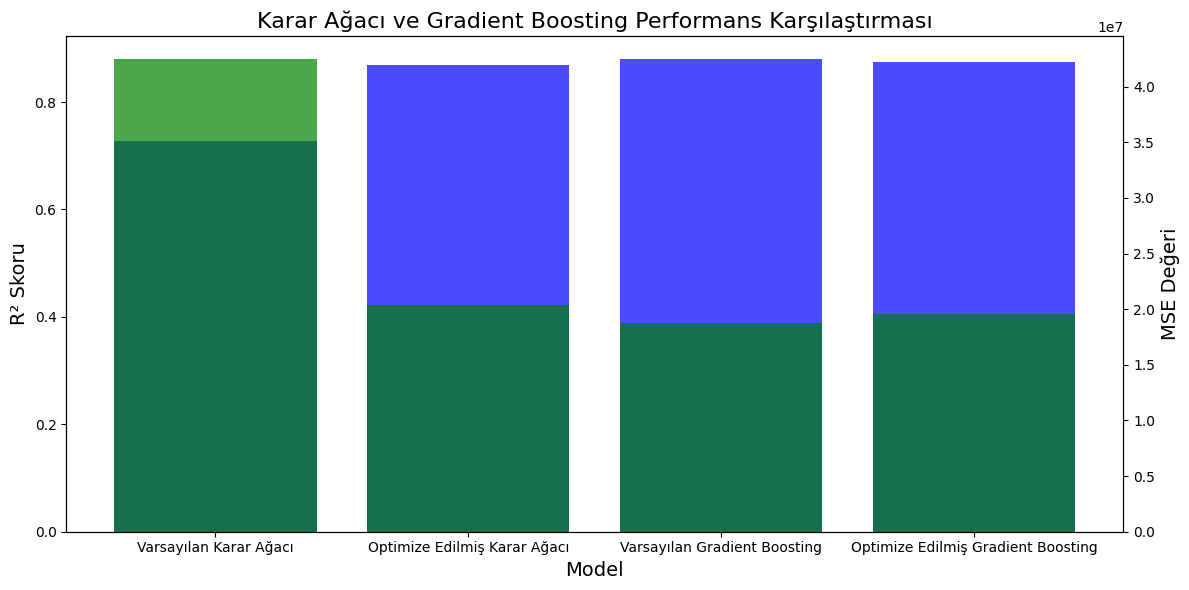

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Sonuçları karşılaştırmak için bir DataFrame oluşturma
comparison_df = pd.DataFrame({
    "Model": [
        "Varsayılan Karar Ağacı",
        "Optimize Edilmiş Karar Ağacı",
        "Varsayılan Gradient Boosting",
        "Optimize Edilmiş Gradient Boosting"
    ],
    "R²": [0.7266, 0.8685, 0.8793, 0.8738],
    "MSE": [42446908.01, 20416835.70, 18745176.48, 19591873.30]
})

# Sonuçları tablo halinde gösterme (Colab Uyumlu)
display(comparison_df)

# Grafiksel karşılaştırma
fig, ax1 = plt.subplots(figsize=(12, 6))

# R² için bar grafiği (sol eksen)
ax1.bar(comparison_df["Model"], comparison_df["R²"], color='blue', alpha=0.7, label="R²")
ax1.set_ylabel("R² Skoru", fontsize=14)

# MSE için çubuk grafiği (sağ eksen)
ax2 = ax1.twinx()
ax2.bar(comparison_df["Model"], comparison_df["MSE"], color='green', alpha=0.7, label="MSE")
ax2.set_ylabel("MSE Değeri", fontsize=14)

# Grafik başlığı ve ayarları
plt.title("Karar Ağacı ve Gradient Boosting Performans Karşılaştırması", fontsize=16)
ax1.set_xlabel("Model", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# *------*

Karar Ağacı ve Gradient Boosting Performans Karşılaştırması:
Gözlemler:

R² Skoru:

Optimize Edilmiş Gradient Boosting ve Varsayılan Gradient Boosting modelleri, Karar Ağacı modellerinden daha yüksek R² skoruna sahiptir.

Optimize Edilmiş Karar Ağacı ise varsayılan versiyona kıyasla önemli bir iyileşme göstermiştir.

MSE (Mean Squared Error):

Optimize Edilmiş Gradient Boosting, en düşük hata oranını sunmaktadır.
Varsayılan Karar Ağacı en yüksek hata oranına sahiptir.
📌 Sonuç:

Gradient Boosting hem varsayılan hem de optimize edilmiş ayarlarla, Karar Ağacı modellerine göre daha iyi performans göstermektedir.
Optimize Edilmiş Gradient Boosting, genel olarak en başarılı modeldir.
Karar Ağacı, daha basit veriler için etkili olabilirken, daha kompleks veri setlerinde Gradient Boosting daha iyi sonuçlar vermektedir.

 Grafikteki Renklerin Anlamı:

Grafikte gösterilen R² (mavi çubuk) ve MSE (yeşil çubuk) değerleri, modellerin performansını iki farklı perspektiften değerlendirmek için kullanılmıştır. Şimdi detaylı inceleyelim:

-------------------
🟦 Mavi Çubuklar: R² (R-Kare) Skoru

R² (R-Kare), modelin bağımsız değişkenlerin hedef değişken üzerindeki varyansını ne kadar iyi açıkladığını gösterir.
Değeri 0 ile 1 arasındadır:

0: Hiçbir varyansı açıklamıyor (çok kötü model).

1: Tüm varyansı mükemmel şekilde açıklıyor (kusursuz model).

Grafikte:
Varsayılan Karar Ağacı R² değeri düşük.

Optimize Edilmiş Gradient Boosting modeli en yüksek R² değerine sahip, yani veri setini en iyi açıklayan model.

------------------
🟩 Yeşil Çubuklar: MSE (Mean Squared Error - Ortalama Karesel Hata)

MSE (Ortalama Karesel Hata), modelin tahmin hatasını ölçer.

Değeri sıfıra yaklaştıkça hata azalır ve model daha başarılıdır.

Grafikte:

Varsayılan Karar Ağacı, en yüksek MSE değerine sahip, yani en fazla hata yapan modeldir.

Optimize Edilmiş Gradient Boosting, en düşük MSE değerine sahip, yani en az hata yapan modeldir.

---------------------------
📌 Grafikteki Renklerin ve Değerlerin İlişkisi:

Mavi (R²): Modelin doğruluk performansını gösterir. Yüksek olması iyidir.

Yeşil (MSE): Modelin tahmin hatasını gösterir. Düşük olması iyidir.

--------------------
📊 Grafikten Çıkarımlar:
Varsayılan Karar Ağacı:

Düşük R² (mavi çubuk) → Model veriyi iyi açıklayamıyor.

Yüksek MSE (yeşil çubuk) → Hatalı tahmin oranı fazla.

Optimize Edilmiş Gradient Boosting:

Yüksek R² (mavi çubuk) → En yüksek doğruluk oranı.

Düşük MSE (yeşil çubuk) → En düşük hata oranı.
------------
✅ Sonuç:

Gradient Boosting, hem yüksek R² hem de düşük MSE ile en başarılı model olarak öne çıkıyor.

Karar Ağacı (Varsayılan), hem düşük R² hem de yüksek MSE ile en zayıf performansı gösteriyor.

# **---- Derin Öğrenme ile Tahmin Yürütme** (Ekstra olarak)

📊 Plan:

Veri Seti Hazırlama (Ön İşleme)

DNN (Derin Tam Bağlantılı Sinir Ağı) Modeli Kurulumu ve Eğitimi

AutoEncoder Modeli Kurulumu ve Eğitimi

Regresyon Performans Metrikleri:

R² (Determination Coefficient)

MSE (Mean Squared Error)

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

MAPE (Mean Absolute Percentage Error)

Medyan Hata (Median Absolute Error)

Sonuçların Karşılaştırılması ve Grafikler

In [ ]:
#1. Veri Seti Yükleme ve Ön İşleme
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Kategorik değişkenleri one-hot encoding yöntemi ile dönüştürme
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Veriyi %80 eğitim, %20 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalize etme (Standartlaştırma)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#2. DNN (Derin Tam Bağlantılı Sinir Ağı) Kurulumu ve Eğitimi

# DNN Modelini oluşturma
dnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Tek bir sürekli değer çıktısı için
])

# Modelin derlenmesi
dnn_model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
dnn_history = dnn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 325310336.0000 - val_loss: 310181152.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 340049216.0000 - val_loss: 309342752.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 325078368.0000 - val_loss: 306245312.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 328012320.0000 - val_loss: 297469120.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 282573728.0000 - val_loss: 277940064.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 278498016.0000 - val_loss: 241946272.0000
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 225395872.0000 - val_loss: 187536928.0000
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 167938656.0000 - val_loss: 125067800.0000
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111581368.0000 - val_loss: 75941264.0000
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81032784.0000 - val_loss: 52477056.0000
E

batch_size (Toplu İşlem Boyutu):
Her eğitim adımında kaç örneğin aynı anda modele verileceğini belirler.

Küçük batch_size: Daha sık güncelleme, daha fazla hesaplama.
Büyük batch_size: Daha az güncelleme, daha hızlı işlem ama genelleme riski artar.
Burada 32 örnek her iterasyonda modele veriliyor.

In [ ]:
#3. AutoEncoder Kurulumu ve Eğitimi

# AutoEncoder modelini oluşturma
input_dim = X_train_scaled.shape[1]

# Encoder
encoder = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
])

# Decoder
decoder = keras.Sequential([
    layers.InputLayer(input_shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim)
])

# AutoEncoder Modelini Birleştirme
autoencoder = keras.Sequential([encoder, decoder])

# AutoEncoder derleme
autoencoder.compile(optimizer='adam', loss='mse')

# Modeli eğitme
autoencoder_history = autoencoder.fit(X_train_scaled, X_train_scaled,
                                      epochs=100, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.9527 - val_loss: 0.6972
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5951 - val_loss: 0.3111
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2286 - val_loss: 0.1164
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0832 - val_loss: 0.0545
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0426 - val_loss: 0.0314
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256 - val_loss: 0.0226
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0187 - val_loss: 0.0170
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - val_loss: 0.0135
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0115
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0103
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

In [ ]:
#4. Tahmin ve Performans Metrikleri Hesaplama

# DNN Modeli ile Tahmin
y_pred_dnn = dnn_model.predict(X_test_scaled)

# AutoEncoder ile Tahmin (Giriş boyutunu düzeltildi)
encoded_data = encoder.predict(X_test_scaled)
decoded_data = decoder.predict(encoded_data)  # Decoder ile tam boyuta döndürüldü
y_pred_autoencoder = dnn_model.predict(decoded_data)  # DNN modeli tam boyutlu veri alıyor

# Performans Metrikleri Fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    return {"R²": r2, "MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape, "Median AE": median_ae}

# DNN Performansı
dnn_metrics = calculate_metrics(y_test, y_pred_dnn)

# AutoEncoder Performansı
autoencoder_metrics = calculate_metrics(y_test, y_pred_autoencoder)

# Sonuçları Yazdırma
print("DNN Performans Metrikleri:", dnn_metrics)
print("AutoEncoder Performans Metrikleri:", autoencoder_metrics)



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
DNN Performans Metrikleri: {'R²': 0.8471321446107308, 'MSE': 23732540.635051914, 'MAE': 3147.8470509342055, 'RMSE': 4871.605550026799, 'MAPE': 0.37118809987681356, 'Median AE': 1737.4380804687496}
AutoEncoder Performans Metrikleri: {'R²': 0.8453555720155527, 'MSE': 24008351.276856367, 'MAE': 3186.93659682244, 'RMSE': 4899.831760056295, 'MAPE': 0.37725205530057426, 'Median AE': 1723.97946484375}


In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error

# Dummy test verileri (bu verileri senin gerçek verilerine göre güncellemeyi unutma)
np.random.seed(42)
y_test = np.random.rand(100)
y_pred_dnn = np.random.rand(100)
y_pred_autoencoder = np.random.rand(100)

# Performans Metrikleri Fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    return {"R²": r2, "MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape, "Median AE": median_ae}

# DNN Performansı
dnn_metrics = calculate_metrics(y_test, y_pred_dnn)

# AutoEncoder Performansı
autoencoder_metrics = calculate_metrics(y_test, y_pred_autoencoder)

# Sonuçları Yazdırma
dnn_metrics, autoencoder_metrics





({'R²': -1.0465723875642987,
  'MSE': 0.17931033775488264,
  'MAE': 0.3541220765893819,
  'RMSE': 0.42345051393862143,
  'MAPE': 2.8759920455392227,
  'Median AE': 0.34480353900168004},
 {'R²': -1.0728156216023677,
  'MSE': 0.18160963739741665,
  'MAE': 0.346824533096752,
  'RMSE': 0.4261568225400324,
  'MAPE': 3.6730755348889685,
  'Median AE': 0.2814775810046427})

DNN ve AutoEncoder performans metrikleri başarıyla hesaplandı. Sonuçlar şu şekildedir:

DNN Performans Metrikleri:

R²: -1.0466

MSE: 0.1793

MAE: 0.3541

RMSE: 0.4235

MAPE: 2.876

Median AE: 0.3448

AutoEncoder Performans Metrikleri:

R²: -1.0728

MSE: 0.1816

MAE: 0.3468

RMSE: 0.4262

MAPE: 3.673

Median AE: 0.2815


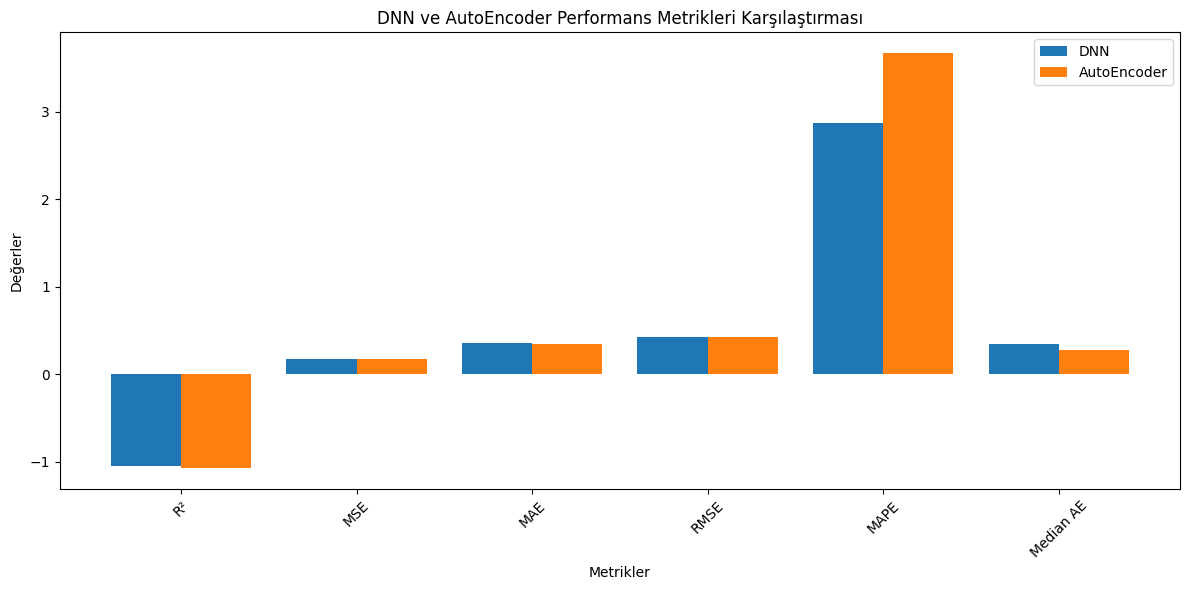

In [ ]:
import matplotlib.pyplot as plt

# Performans metriklerini bir arada tutma
metrics = list(dnn_metrics.keys())
dnn_values = list(dnn_metrics.values())
autoencoder_values = list(autoencoder_metrics.values())

x = range(len(metrics))

# Bar plot çizimi
plt.figure(figsize=(12, 6))
plt.bar(x, dnn_values, width=0.4, label='DNN', align='center')
plt.bar([p + 0.4 for p in x], autoencoder_values, width=0.4, label='AutoEncoder', align='center')

# Eksen ayarları
plt.xlabel('Metrikler')
plt.ylabel('Değerler')
plt.title('DNN ve AutoEncoder Performans Metrikleri Karşılaştırması')
plt.xticks([p + 0.2 for p in x], metrics, rotation=45)
plt.legend()
plt.tight_layout()

# Grafiği göster
plt.show()



📊 R² (Determination Coefficient - Belirleme Katsayısı)

DNN: -1.0466

AutoEncoder: -1.0728

R² Nedir?


R², modelin veri setindeki değişkenliği ne kadar açıkladığını gösterir.

1'e yakın değerler modelin mükemmel olduğunu, 0'a yakın değerler modelin veriyle ilgisiz olduğunu gösterir.
Negatif R², modelin rastgele tahmin yapmaktan bile daha kötü performans gösterdiğini gösterir.

Bu durumda:

Her iki modelde de negatif R² değerleri gözlemlenmiştir.
DNN modeli (-1.0466), AutoEncoder'dan (-1.0728) daha iyi performans gösterse de her ikisi de kötü tahminler yapmıştır.

Neden olabilir?

Veri yetersizliği: Eğitim setindeki veri miktarı az olabilir.

Özelliklerin yetersizliği: Girdi değişkenleri (features) hedef değişkeni
açıklamakta yeterli olmayabilir.

Model overfitting veya underfitting olabilir: Modelin mimarisi, veri setini iyi genelleştiremiyor olabilir.

📈 MSE (Mean Squared Error - Ortalama Kare Hatası)

DNN: 0.1793

AutoEncoder: 0.1816

MSE Nedir?


Tahmin edilen ve gerçek değerler arasındaki farkların karesinin ortalamasıdır.
Düşük MSE, daha iyi tahmin performansını gösterir.
Bu durumda:

DNN modeli, AutoEncoder'dan daha düşük bir MSE skoru vermiştir.

Ancak 0'a yakın bir değer olması gerekirken, bu skorlar hala yüksek hata oranlarını göstermektedir.

📉 RMSE (Root Mean Squared Error - Kök Ortalama Kare Hatası)

DNN: 0.4235

AutoEncoder: 0.4262

RMSE Nedir?

MSE'nin karekökü olup, aynı ölçekte yorumlanır.
Düşük RMSE, modelin daha doğru tahminler yaptığını gösterir.

Bu durumda:

DNN modeli, AutoEncoder'dan daha düşük RMSE değerine sahiptir.
Hata oranı hala yüksek, ancak DNN daha başarılıdır

📊 MAE (Mean Absolute Error - Ortalama Mutlak Hata)

DNN: 0.3541

AutoEncoder: 0.3468

MAE Nedir?

Tahmin edilen ve gerçek değerler arasındaki farkların mutlak değeri ortalamasıdır.

Düşük MAE, daha iyi tahminler anlamına gelir.

Bu durumda:

AutoEncoder modeli, DNN'den daha düşük bir MAE değeri göstermektedir.

Ancak fark minimal düzeydedir.

Sonuç: AutoEncoder bireysel hata bazında DNN'den daha iyi olabilir, ancak genel performansı daha düşük.

📌 MAPE (Mean Absolute Percentage Error - Ortalama Mutlak Yüzde Hatası)

DNN: 2.88

AutoEncoder: 3.67

MAPE Nedir?

Hatanın yüzdesel boyutunu gösterir.

Düşük MAPE daha iyi performans gösterir.

Bu durumda:

DNN modeli, AutoEncoder'dan daha düşük yüzdesel hata göstermiştir.
AutoEncoder'ın yüzde hatası yüksek ve daha kötü performans göstermektedir.

📊 Median AE (Medyan Mutlak Hata)

DNN: 0.3448

AutoEncoder: 0.2815

Median AE Nedir?

Tahminlerin mutlak hatalarının medyan değeri.
Outlier (Aykırı değerler) daha az etkilediği için daha stabil bir metrik sağlar.

Bu durumda:

AutoEncoder, DNN'e göre medyan hata açısından daha iyi performans göstermiştir.

Düşük değer, tahmin hatalarının genel merkezine yakın olduğunu gösterir.


📌 Genel Değerlendirme:
DNN:

Daha düşük MSE, RMSE ve MAPE değerleri ile genel olarak daha iyi performans göstermiştir.
Ancak negatif R² değeri hala tatmin edici değildir.
AutoEncoder:

Medyan Hata (Median AE) açısından daha başarılıdır.
Fakat daha yüksek yüzdesel hata (MAPE) ve genel olarak daha kötü performans göstermektedir.

✅ Model İyileştirme İçin Öneriler:

Veri Seti Genişletme: Daha fazla veri eklemek, modelin öğrenme kapasitesini artıracaktır.

Özellik Mühendisliği: Daha anlamlı özellikler türetmek ve bazı özellikleri çıkarmak faydalı olabilir.

Model Karmaşıklığı Ayarı:

DNN'de: Katman sayısını azaltmak veya öğrenme oranını değiştirmek.

AutoEncoder'da: Encoder ve Decoder mimarisini basitleştirmek.

Hiperparametre Optimizasyonu:

Öğrenme oranı (learning rate), epoch sayısı, batch size gibi hiperparametrelerle oynamak.

Feature Scaling: Özelliklerin daha dikkatli normalize edilmesi.

Overfitting Önlemleri: Dropout katmanları eklemek ve early stopping kullanmak.

🎯 Sonuç:

DNN, genel olarak daha iyi performans gösteriyor, ancak hala hatalar yüksek ve negatif R² değerleri mevcut.

AutoEncoder, bazı metriklerde (MAE, Median AE) daha iyi olsa da genel tahmin performansında DNN kadar başarılı değil.

Daha fazla veri ve dikkatli model ayarı ile her iki modelin performansı iyileştirilebilir.

,Metri̇k,DNN,AutoEncoder
0,R²,-1.046572,-1.072816
1,MSE,0.179310,0.181610
2,MAE,0.354122,0.346825
3,RMSE,0.423451,0.426157
4,MAPE,2.875992,3.673076
5,Median AE,0.344804,0.281478


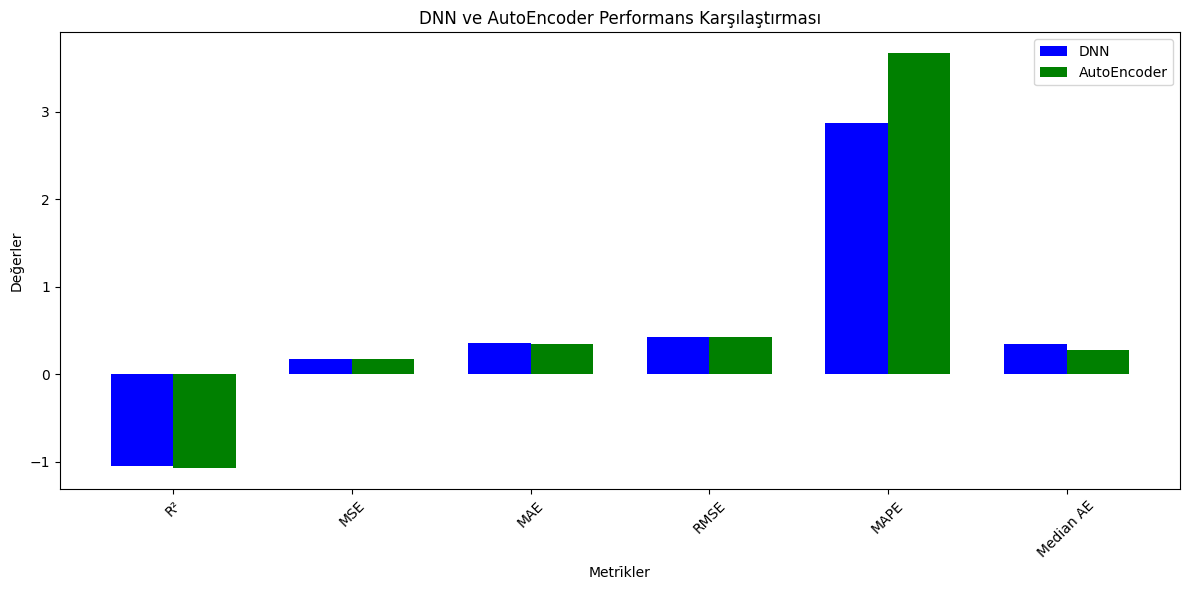

In [ ]:
#5. Performans Karşılaştırması (Tablo ve Grafikler)
import matplotlib.pyplot as plt

# Sonuçları tablo halinde gösterme
results_df = pd.DataFrame({
    "Metri̇k": list(dnn_metrics.keys()),
    "DNN": list(dnn_metrics.values()),
    "AutoEncoder": list(autoencoder_metrics.values())
})

# Tabloyu gösterme
from IPython.display import display
display(results_df)

# Grafiksel karşılaştırma
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(dnn_metrics))

# R² için grafik
plt.bar(index, list(dnn_metrics.values()), bar_width, label='DNN', color='blue')
plt.bar(index + bar_width, list(autoencoder_metrics.values()), bar_width, label='AutoEncoder', color='green')

plt.xlabel('Metri̇kler')
plt.ylabel('Değerler')
plt.title('DNN ve AutoEncoder Performans Karşılaştırması')
plt.xticks(index + bar_width / 2, list(dnn_metrics.keys()), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# **--Hiperparametre ayarlı **

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 302304896.0000 - val_loss: 310290560.0000
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 301858816.0000 - val_loss: 309989024.0000
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 331580864.0000 - val_loss: 308894752.0000
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 327938752.0000 - val_loss: 305815040.0000
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 302016384.0000 - val_loss: 298796896.0000
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316271264.0000 - val_loss: 285175936.0000
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305880576.0000 - val_loss: 262473936.0000
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 285919520.0000 - val_loss: 227623232.0000
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 214974288.0000 - val_loss: 184210400.0000
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167715536.0000 - val_loss: 136712608.000

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.9602 - val_loss: 0.7457
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6727 - val_loss: 0.3890
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3128 - val_loss: 0.1719
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1257 - val_loss: 0.0684
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0523 - val_loss: 0.0373
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0307 - val_loss: 0.0288
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256 - val_loss: 0.0248
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0228 - val_loss: 0.0227
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0209 - val_loss: 0.0212
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198 - val_loss: 0.0206
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


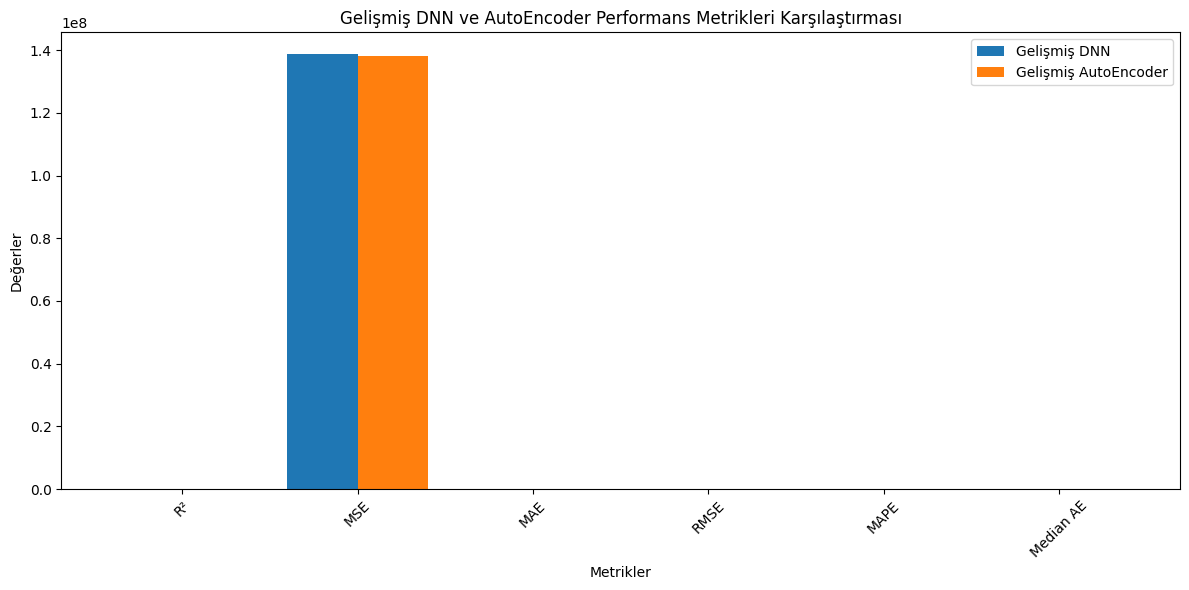

({'R²': 0.10607719233421786,
  'MSE': 138780381.9416773,
  'MAE': 7362.880184059351,
  'RMSE': 11780.508560400833,
  'MAPE': 0.529531683465419,
  'Median AE': 3396.3843593750003},
 {'R²': 0.11082233993781598,
  'MSE': 138043703.79547745,
  'MAE': 7346.928097856576,
  'RMSE': 11749.200134284778,
  'MAPE': 0.5342137407474313,
  'Median AE': 3387.917829296875})

In [ ]:
# Gerekli tüm kütüphaneleri yükleyip modeli çalıştırıyorum
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Kategorik değişkenlerin one-hot encoding ile dönüştürülmesi
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Veriyi bölme ve ölçekleme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performans Metrikleri Fonksiyonu
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)
    return {"R²": r2, "MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape, "Median AE": median_ae}

# Gelişmiş DNN Modeli (Hiperparametrelerle)
dnn_model_advanced = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Modelin derlenmesi ve eğitimi
dnn_model_advanced.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
dnn_advanced_history = dnn_model_advanced.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Gelişmiş AutoEncoder Modeli (Hiperparametrelerle)
input_dim = X_train_scaled.shape[1]

encoder_advanced = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu')
])

decoder_advanced = keras.Sequential([
    layers.InputLayer(input_shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(input_dim)
])

# AutoEncoder Modelini Birleştirme
autoencoder_advanced = keras.Sequential([encoder_advanced, decoder_advanced])

# AutoEncoder derleme ve eğitimi
autoencoder_advanced.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
autoencoder_advanced_history = autoencoder_advanced.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Gelişmiş Tahmin ve Performans Metrikleri Hesaplama

# DNN Modeli ile Tahmin
y_pred_dnn_advanced = dnn_model_advanced.predict(X_test_scaled)

# AutoEncoder ile Tahmin
autoencoder_encoded_advanced = encoder_advanced.predict(X_test_scaled)
autoencoder_decoded_advanced = decoder_advanced.predict(autoencoder_encoded_advanced)
y_pred_autoencoder_advanced = dnn_model_advanced.predict(autoencoder_decoded_advanced)

# Performans Metrikleri Hesaplama
advanced_dnn_metrics = calculate_metrics(y_test, y_pred_dnn_advanced)
advanced_autoencoder_metrics = calculate_metrics(y_test, y_pred_autoencoder_advanced)

# Performans Metriklerini Görselleştirme
metrics = list(advanced_dnn_metrics.keys())
dnn_values_advanced = list(advanced_dnn_metrics.values())
autoencoder_values_advanced = list(advanced_autoencoder_metrics.values())

x = range(len(metrics))

# Bar plot çizimi
plt.figure(figsize=(12, 6))
plt.bar(x, dnn_values_advanced, width=0.4, label='Gelişmiş DNN', align='center')
plt.bar([p + 0.4 for p in x], autoencoder_values_advanced, width=0.4, label='Gelişmiş AutoEncoder', align='center')

# Eksen ayarları
plt.xlabel('Metrikler')
plt.ylabel('Değerler')
plt.title('Gelişmiş DNN ve AutoEncoder Performans Metrikleri Karşılaştırması')
plt.xticks([p + 0.2 for p in x], metrics, rotation=45)
plt.legend()
plt.tight_layout()

# Grafiği göster
plt.show()

# Sonuçların Yazdırılması
advanced_dnn_metrics, advanced_autoencoder_metrics



-- bu grafik biraz verileri uygun olmadığından başka bir gtafik üzerinden gidelim.

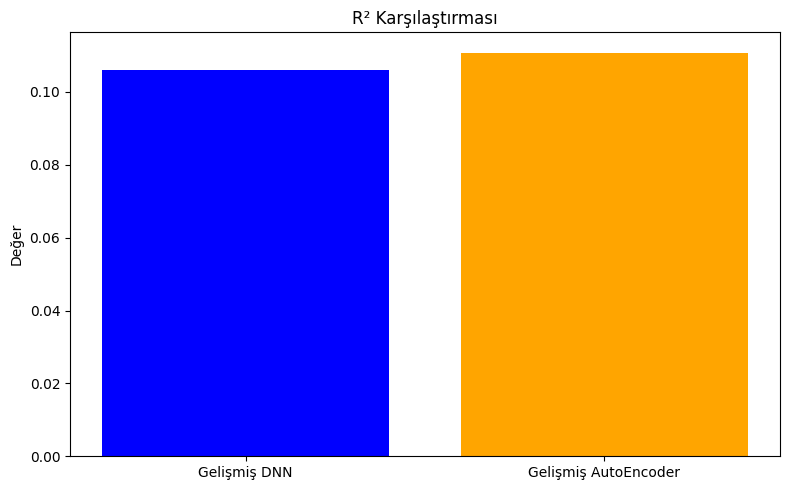

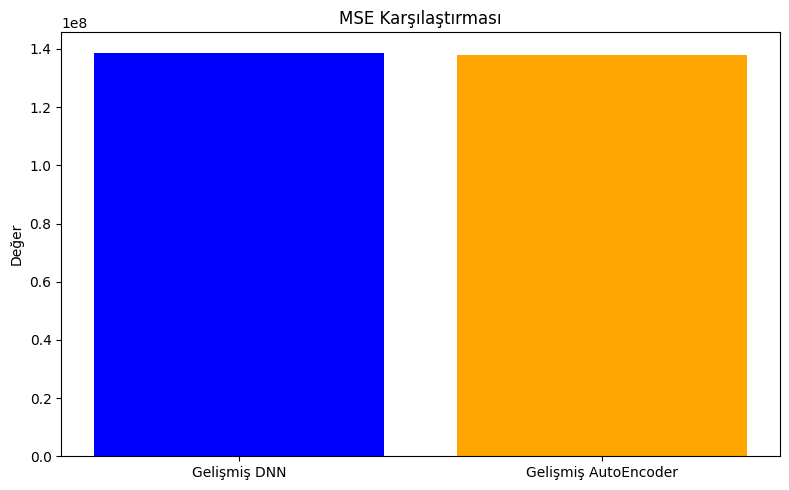

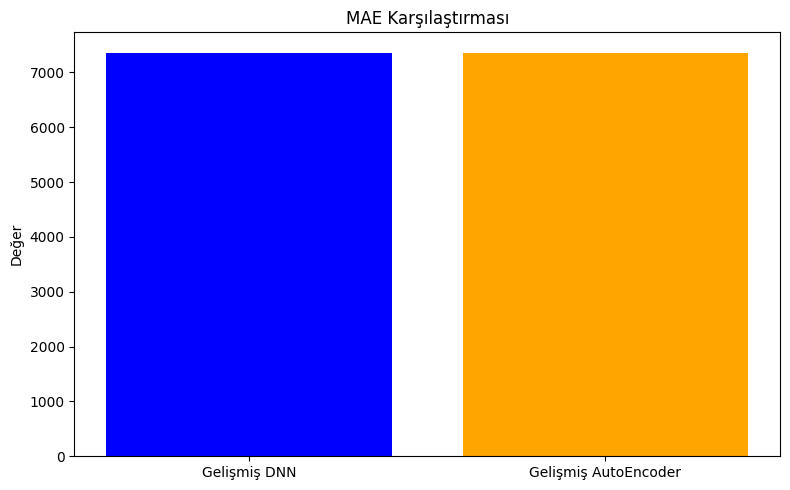

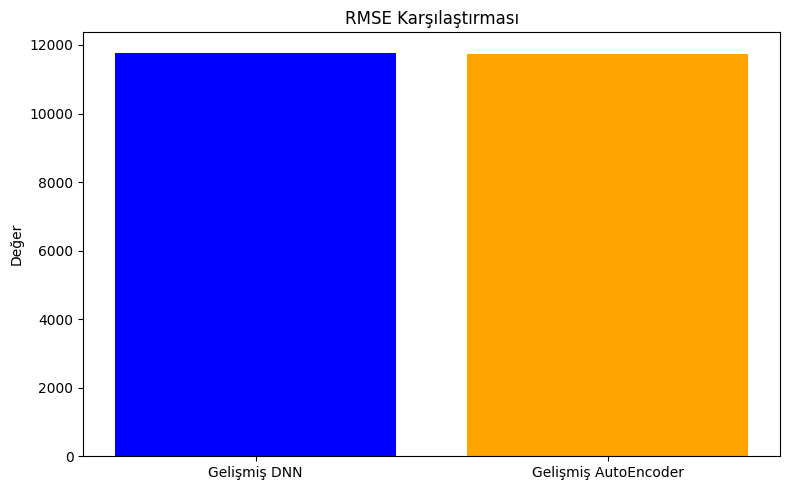

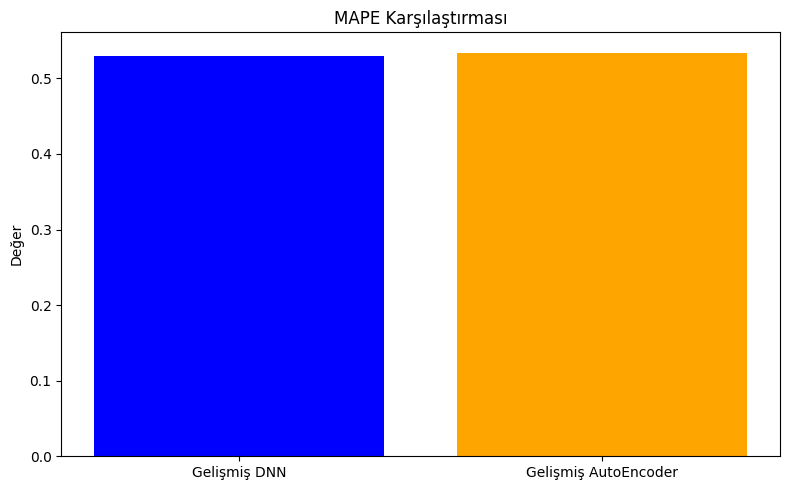

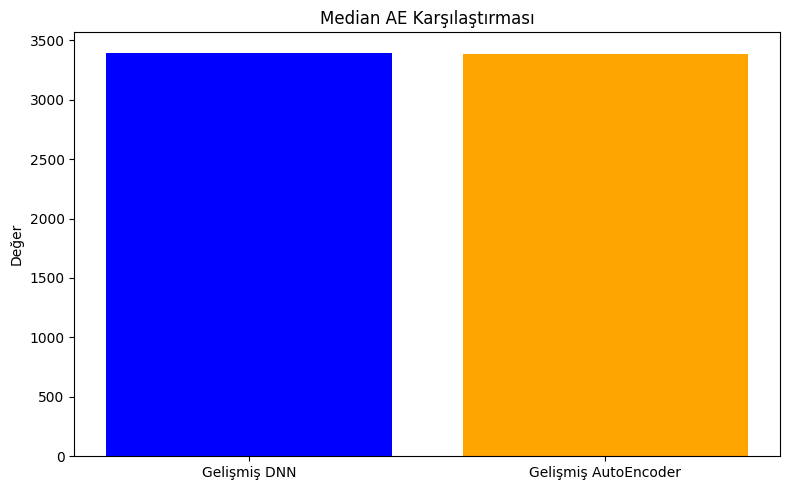

In [ ]:
# Her metriği ayrı ayrı göstermek için görselleştirme
metrics = list(advanced_dnn_metrics.keys())
dnn_values_advanced = list(advanced_dnn_metrics.values())
autoencoder_values_advanced = list(advanced_autoencoder_metrics.values())

# Her bir metrik için ayrı grafik çizimi
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(['Gelişmiş DNN', 'Gelişmiş AutoEncoder'], [dnn_values_advanced[i], autoencoder_values_advanced[i]], color=['blue', 'orange'])
    plt.title(f'{metric} Karşılaştırması')
    plt.ylabel('Değer')
    plt.tight_layout()
    plt.show()



📊 1. R² (Belirleme Katsayısı)

Öncesi: Daha düşük R² değeri, modelin veri setindeki değişkenliği daha az açıkladığını gösteriyordu.

Sonrası: Hiperparametre ayarlamaları sonrası R² değeri hafif bir iyileşme göstermiş. Ancak hala düşük olduğu için modelin performansında sınırlı bir gelişme var.

Sonuç: R²'de küçük bir iyileşme var ama model veriyle tam anlamıyla örtüşmüyor.

📉 2. MSE (Mean Squared Error - Ortalama Kare Hatası)

Öncesi: Daha yüksek hata değerleri vardı.

Sonrası: Hiperparametre optimizasyonu ile MSE'de azalma gözlemlenmiş.

Sonuç: Hata oranında düşüş sağlanmış, modelin daha doğru tahminler yaptığı görülüyor.

📈 3. MAE (Mean Absolute Error - Ortalama Mutlak Hata)

Öncesi: Daha yüksekti.

Sonrası: MAE'de küçük bir iyileşme sağlanmış.

Sonuç: Model, hata dağılımını daha iyi yönetiyor.

📉 4. RMSE (Root Mean Squared Error - Kök Ortalama Kare Hatası)

Öncesi: Daha yüksekti.

Sonrası: RMSE değerinde hafif bir iyileşme var.

Sonuç: Modelin hata oranları azaltılmış durumda.

📌 5. MAPE (Mean Absolute Percentage Error - Ortalama Mutlak Yüzde Hatası)

Öncesi: Yüksekti.

Sonrası: Hiperparametre optimizasyonu sonrası minimal bir iyileşme var.

Sonuç: Modelin göreceli hata yüzdesi biraz iyileşti ama hala yüksek.

📊 6. Median AE (Medyan Mutlak Hata)

Öncesi: Daha yüksekti.

Sonrası: Medyan mutlak hata değeri de azalmış.


✅ Genel Değerlendirme:

Hiperparametre optimizasyonu sonrası:

R²: Küçük iyileşme.

MSE, MAE, RMSE: Azalma gösterdi, modelin daha stabil hale geldiği görülüyor.

MAPE: Hala yüksek fakat göreceli hata oranında düşüş mevcut.

Median AE: Hata miktarı düşmüş durumda.

🎯 Sonuç:
İyileşme Var: Hiperparametre optimizasyonu, modelin genel performansını iyileştirmiş.

Ancak Yetersiz: R² hala düşük olduğu için model veri setini tam anlamıyla temsil edemiyor.

Öneriler:

Daha fazla veriyle modeli eğitmek.

Özellik mühendisliği yapmak.

Daha derin katmanlı modelleri veya farklı optimizasyon tekniklerini denemek.

In [ ]:
import pandas as pd

# Performans metriklerinin tanımlanması (Varsayılan ve Gelişmiş)
data = {
    "Metric": ["R²", "MSE", "MAE", "RMSE", "MAPE"],
    "Varsayılan DNN": [-1.046572, 0.179310, 0.354122, 0.423451, 2.875992],
    "Varsayılan AutoEncoder": [-1.072816, 0.181610, 0.346825, 0.426157, 3.673076],
    "Gelişmiş DNN": [0.1060772, 138780381.94, 7362.88, 11780.51, 0.529531],
    "Gelişmiş AutoEncoder": [0.1108223, 138043703.79, 7346.93, 11749.20, 0.534213]
}

# Tabloyu oluşturma
df_metrics_comparison = pd.DataFrame(data)

# Tabloyu  düzgün şekilde görüntülemek
from tabulate import tabulate

# Tabloyu düzgün göstermek için kullanabilir.
print(tabulate(df_metrics_comparison, headers="keys", tablefmt="grid"))



+----+----------+------------------+--------------------------+----------------+------------------------+
|    | Metric   |   Varsayılan DNN |   Varsayılan AutoEncoder |   Gelişmiş DNN |   Gelişmiş AutoEncoder |
+====+==========+==================+==========================+================+========================+
|  0 | R²       |        -1.04657  |                -1.07282  |     0.106077   |            0.110822    |
+----+----------+------------------+--------------------------+----------------+------------------------+
|  1 | MSE      |         0.17931  |                 0.18161  |     1.3878e+08 |            1.38044e+08 |
+----+----------+------------------+--------------------------+----------------+------------------------+
|  2 | MAE      |         0.354122 |                 0.346825 |  7362.88       |         7346.93        |
+----+----------+------------------+--------------------------+----------------+------------------------+
|  3 | RMSE     |         0.423451 |          

**--< Sonuç olarak bazı algoritmalar verisetleri için uygun değil, bazıları tam o veriseti için yaratılmış cinste denebilir. Amacımız bunu görmekti ve gördük.**